# Starbucks Capstone Challenge

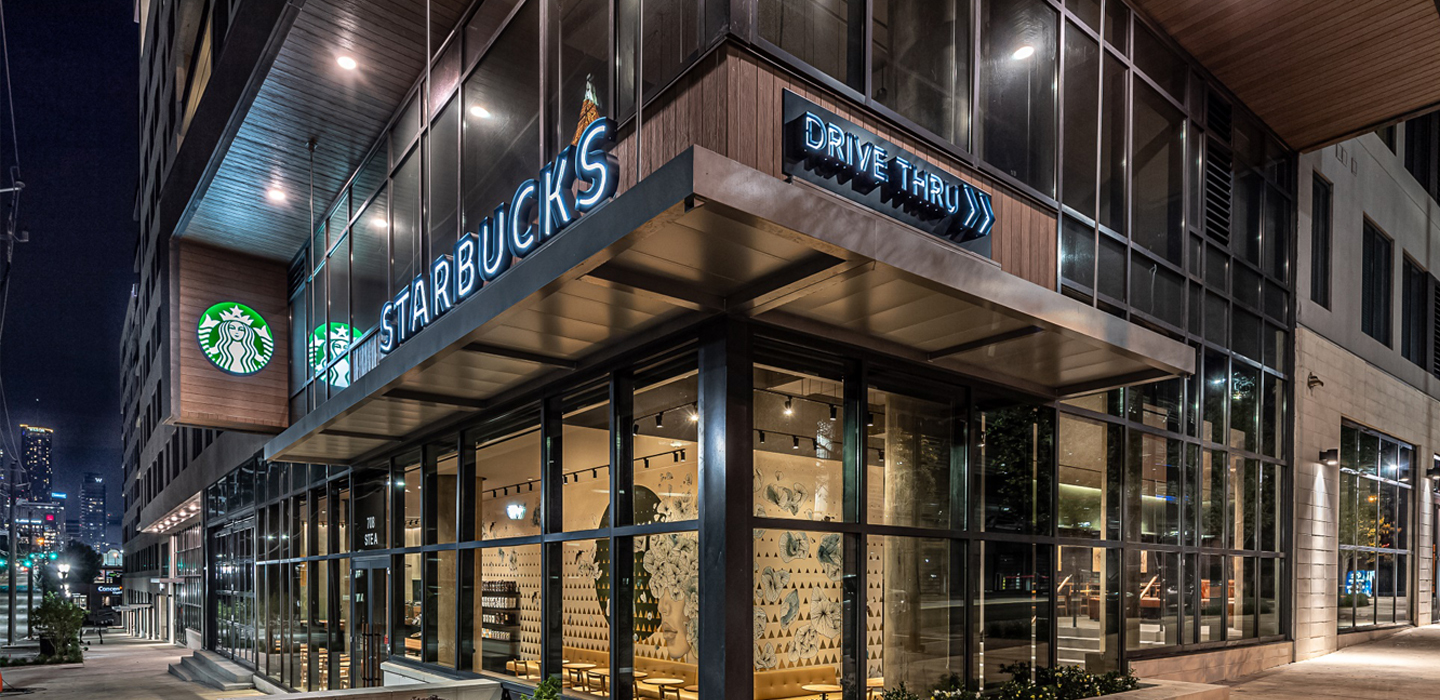

## Table of Contents

1. [Business Understanding](#1)
<br>    1.1. [Business Goals](#1.1)
<br>    1.2. [Situation Assessment](#1.2)
<br>    1.3. [Project Goals](#1.3)
<br>    1.4. [Project Plan](#1.4)

2. [Data Understanding](#2)
<br>    2.1. [Import Packages](#2.1)
<br>    2.2. [Gather Data](#2.2)
<br>    2.21. [Portfolio Data EDA](#2.21)
<br>    2.22. [Profile Data EDA](#2.22)
<br>    2.23. [Transcript Data EDA](#2.22)
<br>    2.3. [Assess Data](#2.3)

3. [Data Preperation](#3)
<br>    3.1. [Clean Data](#3.1)
<br>    3.2. [Integrating](#3.2)
<br>    3.3. [Numerical variable analysis](#3.2)

4. [Modelling](#4)
<br>    4.1. [Pre-processing](#4.1)
<br>    4.2. [Designing Tests](#4.2)
<br>    4.21. [Feature Scaling](#4.21)
<br>    4.22. [Explanatory Data Analysis](#4.22)
<br>    4.3. [Building models](#4.3)
<br>    4.4. [Assessing models](#4.4)

5. [Evaluation](#5)
<br>    5.1. [Evaluating results](#5.1)
<br>    5.2. [Reviewing the process](#5.2)
<br>    5.3. [Determining the next steps](#5.3)

6. [Deployment](#6)
<br>    6.1. [Planning deployment](#6.1)
<br>    6.2. [Reporting final results](#6.2)
<br>    6.3. [Reviewing final results](#6.3)

7. [Resources](#7)

<a id='1'></a>
## 1. Business Understanding

<a id='1.1'></a>
### 1.1. Business Goals

#### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.

Our task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. We'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, we can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

We'll use transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer.

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

#### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.  This could make data cleaning especially important and tricky.

#### Cleaning

We also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, we wouldn't want to send a buy 10 dollars get 2 dollars off offer. We want to try to assess what a certain demographic group will buy when not receiving any offers.

#### Analysis

Since this is a capstone project, we are free to analyze the data any way we see fit. For example, we could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or, we could build a model that predicts whether or not someone will respond to an offer but we don't need to build a machine learning model at all. We could develop a set of heuristics that determine what offer we should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

<a id='1.2'></a>
### 1.2. Situation Assessment

#### Inventory of resources

- Computer
- Dataset
- Jupyter Notebooks

#### Requirements, assumptions, and constraints

Completion by: 09/08/21

#### Risks and contingencies

- **Risk:** major changes in notebook.
- **Contingency:** Regular version uploads to GitHub.

#### Terminology

Create a list here of business terms and data-mining terms that are relevant to our project and write them down in a glossary with definitions (and perhaps examples), so that everyone involved in the project can have a common understanding of those terms.

#### Costs and benefits

Cost benefits will be documented here if data allows.

<a id='1.3'></a>
### 1.3. Project Goals

- Create a ML model to predict if a customer will respond to an offer.

<a id='1.4'></a>
### 1.4. Project Plan

#### Step 1

The plan is to build a machine learning model which predicts if a customer will respond to an offer or not. I believe the best strategy is to combine the data from the `portfolio`, `profile` and `transaction` datasets. From this created DataFrame, we will have various observations of each customer, offer, and transaction data. This will help me determine which attributes may affect if the customer will be successful completing an offer or not.

#### Step 2

Create visualisations for important columns such as how `gender`, `income` or when a user became a member. We can use this data to give us an idea of what data to keep or remove from the dataset.

#### Step 3

We an next create a **naive model** that assumes all offers were successful. From there, we will evaluate the **accuracy** and **F1-score** of the model to use a baseline to compare other models against. The **accuracy** is a measurement of how well our model correctly predicts if a offer is successful but it is not useful if the score is low. In the event the **accuracy** is low, we will need to use **precision** and **recall** to measure model performance since it's a weighted average of the **F1-score**.

#### Step 4

The **Naive Model** we created may not have the best performance with our data, so we must compare different models to see which one performs best. We can compare:
- **Logistic Regression.**
- **Random Forest.**

From here, we can fine tune the parameters of the model with the highest **accuracy** and **F1-score**.

#### Step 5

We can finish by concluding our findings in a debrief at the end.

<a id='2'></a>
## 2. Data Understanding

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

<a id='2.1'></a>
### 2.1. Import Packages

In [1]:
# Import
import pandas as pd
import numpy as np
import math
import json
import pickle
from datetime import datetime, date
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import os
from joblib import dump, load
from tqdm import tqdm
import re
from re import search
import time
import logging

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import custom modules
from cf_matrix import make_confusion_matrix

# Display options
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# Check module versions
print('Pandas Version:', pd.__version__)
print('NumPy Version:', np.__version__)
print('Seaborn Version:', sns.__version__)
print('Matplotlib Version:', matplotlib.__version__)

Pandas Version: 1.3.0
NumPy Version: 1.21.0
Seaborn Version: 0.11.1
Matplotlib Version: 3.4.2


#### Preparing Seaborn and other Functions

In [2]:
# Function for formatting 1 plot seaborn chart
def style_sns_1(title, xlabel, ylabel):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title - seaborn plot title (string)
    _label - seaborn plot label (string or list)
    
    OUTPUT:
    None.
    '''
    
    # Titles
    plt.title(title, weight='bold', fontsize=15)

    # Labels
    plt.xlabel(xlabel, weight='bold', fontsize=13)
    plt.ylabel(ylabel, weight='bold', fontsize=13)

    # Design
    plt.xticks(size=13); plt.yticks(size=13)
    
    # Show plot
    plt.show()
    
# Function for formatting 2 plot seaborn chart
def style_sns_2(title_1, title_2, xlabel_1, ylabel_1, xlabel_2, ylabel_2):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title_n - seaborn plot title on axis n (string)
    label_n - seaborn plot label on axis n (string or list)
    
    OUTPUT:
    None.
    '''

    # Titles
    axes[0].set_title(title_1, weight='bold', fontsize=15)
    axes[1].set_title(title_2, weight='bold', fontsize=15)

    # Labels
    ax1.set_xlabel(xlabel_1, weight='bold', fontsize=13)
    ax1.set_ylabel(ylabel_1, weight='bold', fontsize=13)
    ax2.set_xlabel(xlabel_2, weight='bold', fontsize=13)
    ax2.set_ylabel(ylabel_2, weight='bold', fontsize=13)

    # Design
    ax1.tick_params(labelsize=13); ax2.tick_params(labelsize=13)
    
    # Show plot
    plt.show()
    
# Function for formatting 3 plot seaborn chart
def style_sns_3(title_1, title_2, title_3, xlabel_1, ylabel_1, xlabel_2, ylabel_2, xlabel_3, ylabel_3):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title_n - seaborn plot title on axis n (string)
    label_n - seaborn plot label on axis n (string or list)
    
    OUTPUT:
    None.
    '''

    # Titles
    axes[0].set_title(title_1, weight='bold', fontsize=15)
    axes[1].set_title(title_2, weight='bold', fontsize=15)
    axes[2].set_title(title_3, weight='bold', fontsize=15)

    # Labels
    ax1.set_xlabel(xlabel_1, weight='bold', fontsize=13)
    ax1.set_ylabel(ylabel_1, weight='bold', fontsize=13)
    ax2.set_xlabel(xlabel_2, weight='bold', fontsize=13)
    ax2.set_ylabel(ylabel_2, weight='bold', fontsize=13)
    ax3.set_xlabel(xlabel_3, weight='bold', fontsize=13)
    ax3.set_ylabel(ylabel_3, weight='bold', fontsize=13)

    # Design
    ax1.tick_params(labelsize=13); ax2.tick_params(labelsize=13); ax3.tick_params(labelsize=13)
    
    # Show plot
    plt.show()
    
# Function for formatting 4 plot seaborn chart
def style_sns_4(title_1, title_2, title_3, title_4, 
                xlabel_1, ylabel_1, xlabel_2, ylabel_2, 
                xlabel_3, ylabel_3, xlabel_4, ylabel_4):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title_n - seaborn plot title on axis n (string)
    label_n - seaborn plot label on axis n (string or list)
    
    OUTPUT:
    None.
    '''

    # Titles
    axes[0,0].set_title(title_1, weight='bold', fontsize=15)
    axes[0,1].set_title(title_2, weight='bold', fontsize=15)
    axes[1,0].set_title(title_3, weight='bold', fontsize=15)
    axes[1,1].set_title(title_4, weight='bold', fontsize=15)

    # Labels
    axes[0,0].set_xlabel(xlabel_1, weight='bold', fontsize=13)
    axes[0,0].set_ylabel(ylabel_1, weight='bold', fontsize=13)
    axes[0,1].set_xlabel(xlabel_2, weight='bold', fontsize=13)
    axes[0,1].set_ylabel(ylabel_2, weight='bold', fontsize=13)
    axes[1,0].set_xlabel(xlabel_3, weight='bold', fontsize=13)
    axes[1,0].set_ylabel(ylabel_3, weight='bold', fontsize=13)
    axes[1,1].set_xlabel(xlabel_4, weight='bold', fontsize=13)
    axes[1,1].set_ylabel(ylabel_4, weight='bold', fontsize=13)

    # Design
    #ax1.tick_params(labelsize=13); ax2.tick_params(labelsize=13); 
    #ax3.tick_params(labelsize=13); ax4.tick_params(labelsize=13)
    
    # Show plot
    plt.show()    
    
# Function for formatting a pie chart
def style_pie_1(title, labels, data):
    '''This function styles matplotlib pie charts
    
    INPUT:
    title - pie chart title (string)
    labels - pie chart plot label (string or list)
    data - df 
    
    OUTPUT:
    None.
    '''
    
    # Set default plt font size
    plt.rcParams['font.size'] = 15

    # Init plot
    pie, ax = plt.subplots(figsize=[10,6])
    exp_n = len(labels)

    # Title
    plt.title(title, weight='bold', fontsize=15);

    # Plot
    plt.pie(x=data, labels=labels, autopct="%.1f%%", explode=[0.05]*exp_n, pctdistance=0.5)
    plt.show()

In [3]:
# Print bold text
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

<a id='2.2'></a>
### 2.2. Gather Data

**Gather necessary data to answer our questions:**<br>
We have imported the libraries we need above. We will gather data provided to us from Udacity in the form of json files. The next step is to use `pd.read_json()` to import our data into pandas as dataframes.

In [4]:
# Read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

<a id='2.21'></a>
### 2.21 `Portfolio` Data EDA

**`Portfolio` Data Info**

This dataset holds data on the different offer campaigns used in the Starbucks app.

In [5]:
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [6]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [7]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

**`Portfolio` Offer Type Distribution**

In [8]:
[*portfolio['offer_type'].unique()]

['bogo', 'informational', 'discount']

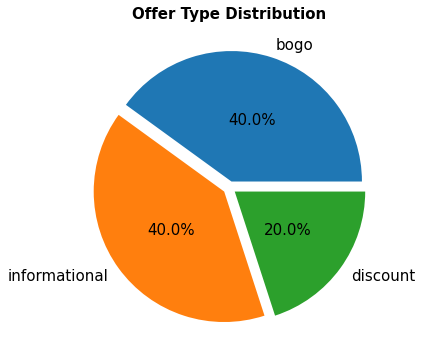

In [9]:
style_pie_1(title='Offer Type Distribution', labels=[*portfolio['offer_type'].dropna().unique()],
            data=portfolio['offer_type'].value_counts())

**`Portfolio Data` Observations:** 
- There are three types of offer including BOGO, information, discount offers
- There are 10 different offers in total. 4 of them are discounts, 4 are BOGO (Buy One Get One Free), and 2 of them are informational (advertisments).
- The `reward` and `difficulty` columns are in USD (US Dollars) units.
- The `duration` column is measured in `days`
- The `channel`, `offer_type`, and `id` columns are categorical
- There are no null values

<a id='2.22'></a>
### 2.22 `Profile` Data EDA

**`Profile` Data Info**

This dataset holds data on the demographics of users on the Starbucks app.

In [10]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [11]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [12]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [13]:
# Looking for outliers
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


**`Profile` Age and Income Distribution**

In [14]:
profile[['age', 'income']].mean()

age          62.531412
income    65404.991568
dtype: float64

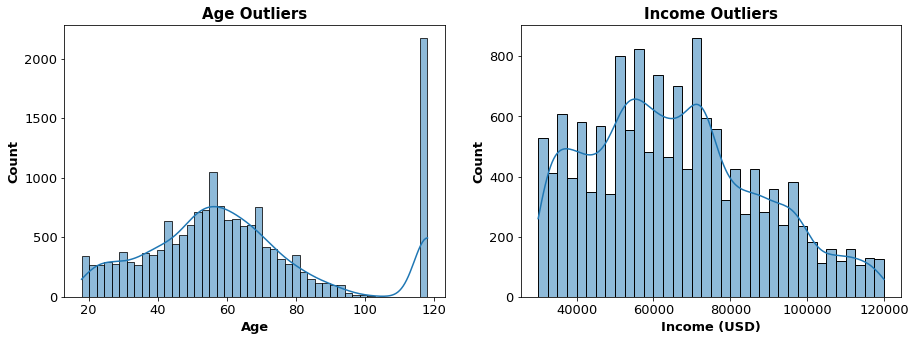

In [15]:
# Looking for age and income outliers in profile using histplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Plots
ax1 = sns.histplot(ax=axes[0], data=profile, x='age', kde=True)
ax2 = sns.histplot(ax=axes[1], data=profile, x='income', kde=True)

# Style plot
style_sns_2('Age Outliers', 'Income Outliers', 'Age', 'Count', 'Income (USD)', 'Count')

**`Profile` Age and Income Distribution by Gender**

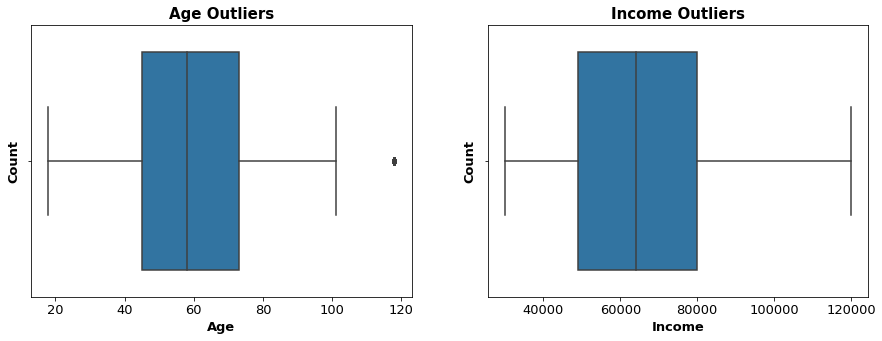

In [16]:
# Looking for age and income outliers in profile using boxplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Plots
ax1 = sns.boxplot(ax=axes[0], data=profile, x='age')
ax2 = sns.boxplot(ax=axes[1], data=profile, x='income')

# Style plot
style_sns_2('Age Outliers', 'Income Outliers', 'Age', 'Count', 'Income', 'Count')

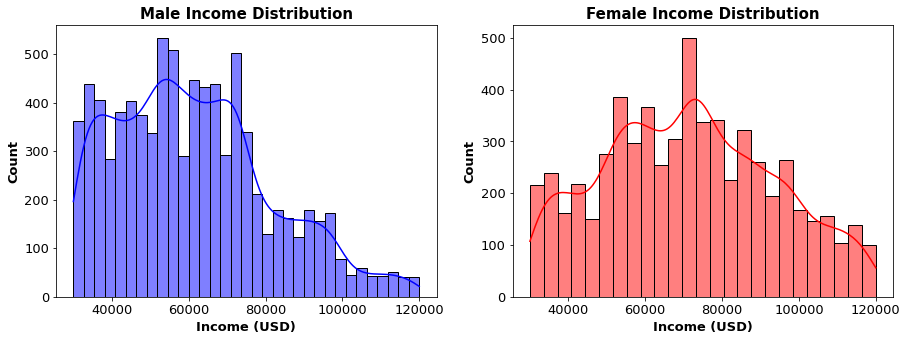

In [17]:
# Income for the main two genders in profile using histplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Data
profile_male = profile[profile['gender'] == 'M']
profile_female = profile[profile['gender'] == 'F']

# Plots
ax1 = sns.histplot(ax=axes[0], data=profile_male, x='income', kde=True, color='blue')
ax2 = sns.histplot(ax=axes[1], data=profile_female, x='income', kde=True, color='red')

# Style plot
style_sns_2('Male Income Distribution', 'Female Income Distribution', 'Income (USD)', 'Count', 'Income (USD)', 'Count')

**`Profile` Age Groups Distribution**

In [18]:
print('Minimum age:', profile['age'].min())
print('Maximum age:', profile['age'].max())

Minimum age: 18
Maximum age: 118


In [19]:
# Create age groups
age_ranges = profile.drop(columns=['id', 'became_member_on', 'income']).copy()
a = age_ranges['age']
age_ranges['age_group'] = a

# Filter age ranges, then replace income integer with strings
age_ranges.loc[a.between(18, 24), 'age_group'] = '18-24'
age_ranges.loc[a.between(25, 34), 'age_group'] = '25-34'
age_ranges.loc[a.between(35, 44), 'age_group'] = '35-44'
age_ranges.loc[a.between(45, 54), 'age_group'] = '45-54'
age_ranges.loc[a.between(55, 64), 'age_group'] = '55-64'
age_ranges.loc[a.between(65, 74), 'age_group'] = '65-74'
age_ranges.loc[a.between(75, 84), 'age_group'] = '75-84'
age_ranges.loc[a.between(66, 94), 'age_group'] = '85-94'
age_ranges.loc[a.between(95, 104), 'age_group'] = '95-104'
age_ranges.loc[a.between(105, 119), 'age_group'] = '105+'

# Null data age ranges
null_ranges = age_ranges.loc[a.between(105, 118)]

In [20]:
# Formatting data for grouped bar plot
age_ranges = age_ranges.groupby(['age_group', 'gender'])['age'].count().reset_index().rename(columns={'age':'count'})
age_ranges['gender'] = age_ranges['gender'].replace({'F':'Female', 'M':'Male', 'O':'Other'})

In [21]:
age_ranges

,age_group,gender,count
0,18-24,Female,238
1,18-24,Male,629
2,18-24,Other,9
3,25-34,Female,407
4,25-34,Male,955
5,25-34,Other,18
6,35-44,Female,622
7,35-44,Male,1218
8,35-44,Other,29
9,45-54,Female,1247


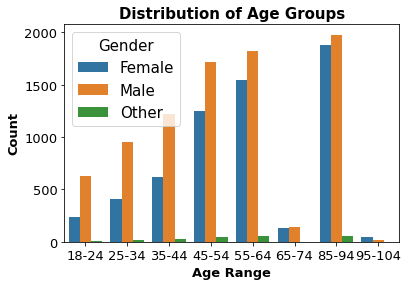

In [22]:
# Plot
sns.barplot(x='age_group', y='count', hue='gender', data=age_ranges).legend(title='Gender')

# Styling
style_sns_1(title='Distribution of Age Groups', xlabel='Age Range', ylabel='Count')

**Note:** None gender ages are omitted from the bar plot due to missing data.

In [23]:
# Sample of age ranges with null gender values
null_ranges.head()

,gender,age,age_group
0,None,118,105+
2,None,118,105+
4,None,118,105+
6,None,118,105+
7,None,118,105+


In [24]:
# Total count of ages over 115
print('Age outlier count:', profile['age'][profile['age'] > 115].count())

# Finding percentage of outliers in age
outliers = profile['age'][profile['age'] > 115].count()
all_age_counts = profile ['age'].count()
print('Age outlier percentage:', round(outliers/all_age_counts*100, 2), '%')

Age outlier count: 2175
Age outlier percentage: 12.79 %


We can see a large number of outliers here in the age column showing around 120 years of age. We could just use the median age to fill their values but the dataset would be imbalanced with most datapoints coming from the median age range. Since we only found 2175 ages over 115, we can safely delete them. We also found a pattern that all ages of 118 have a gender of `none` and income of `NaN`. This suggests to me there is an error with the data being input so it is useless to us even if we decided to impute the values.

**`Profile` Gender Distribution**

In [25]:
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

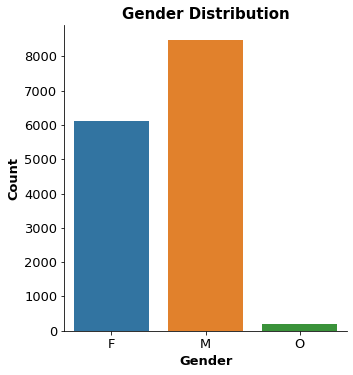

In [26]:
# Gender distribution
sns.catplot(x='gender', kind='count', data=profile)

# Style plot
style_sns_1('Gender Distribution', 'Gender', 'Count')

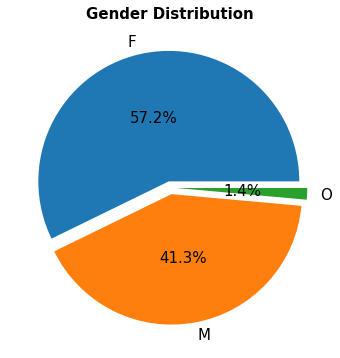

In [27]:
style_pie_1(title='Gender Distribution', labels=[*profile['gender'].dropna().unique()],
            data=profile['gender'].value_counts())

**`Profile` Distribution of when customer became a rewards member**

In [28]:
# Percentage of years users became members on
became_member_on = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
became_member_year = became_member_on.dt.year.value_counts()
became_member_year *= 100 / became_member_year.sum()
became_member_year

2017    38.052941
2018    24.694118
2016    20.741176
2015    10.764706
2014     4.064706
2013     1.682353
Name: became_member_on, dtype: float64

In [29]:
# Percentage of years users became members on
became_member_on = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
became_member_month = became_member_on.dt.month.value_counts()
became_member_month *= 100 / became_member_month.sum()
became_member_month

8     9.470588
10    9.223529
12    9.152941
1     8.970588
9     8.911765
11    8.523529
7     7.994118
3     7.817647
4     7.735294
5     7.688235
6     7.441176
2     7.070588
Name: became_member_on, dtype: float64

In [30]:
# Prepare data for bar plot
profile_members = profile[['became_member_on', 'gender']].copy()
profile_members['year'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d').dt.year
profile_members['gender'] = profile_members['gender'].replace({'F':'Female', 'M':'Male', 'O':'Other'})
member_date = profile_members.groupby(['year','gender']).count().reset_index().iloc[:,:3].rename(
    columns={'became_member_on':'count'})

member_date

,year,gender,count
0,2013,Female,74
1,2013,Male,197
2,2013,Other,3
3,2014,Female,138
4,2014,Male,520
5,2014,Other,4
6,2015,Female,663
7,2015,Male,905
8,2015,Other,29
9,2016,Female,1509


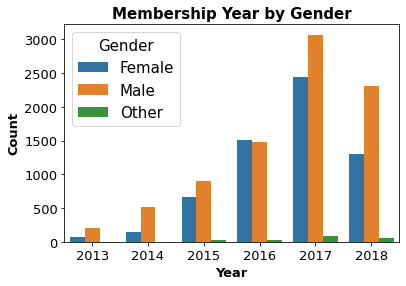

In [31]:
# Plot
sns.barplot(x='year', y='count', hue='gender', data=member_date).legend(title='Gender')

# Styling
style_sns_1(title='Membership Year by Gender', xlabel='Year', ylabel='Count')

**`Profile Data` Observations:** 
- The meadian and mean age of users is around 55 years old
- The maximum age is 118 which is an error, but the minimum age is 18
- Observations with age as 118 seem to be bad data since only the `id` hash is provided
- The income seems to have the most users between 50,000 to 70,000 USD which shows our demographic is mainly older, wealthier individuals
- The maximum income is 120,000 USD, but the minimum is 30,000 USD
- `id` column contains verbose hashes that can be converted to integers to make them easier to navigate
- The hashes should be mapped to the `Transcript` DataFrame since we can match the `id` values
- Females account for 57.2% of the dataset, males account for 41.3% and other only 1.4%. The gender distribution could create some imbalance later

<a id='2.23'></a>
### 2.23 `Transcript` Data EDA

**`Transcript` Data Info**

This dataset holds the transaction data including records for transactions, offers received, offers viewed, and offers completed.

In [32]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [33]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [34]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [35]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [36]:
transcript['person'].nunique()

17000

In [37]:
# Exploring the dictionaries
transcript['value'][0]

{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}

In [38]:
type(transcript['value'][0])

dict

In [39]:
transcript['value'][0].keys()

dict_keys(['offer id'])

In [40]:
# Iterate through the keys in value_col and append to list
value_col = transcript['value']
dict_counter = []
for x in value_col:
    try:
        dict_counter.append([*x.keys()]) # *unpacks the dict to reveal each string value
    except:
        dict_counter.extend([*x.keys()]) # if two values or more cause error then extend list

# File name        
file_name = "data/dict_counter.pkl"

# Save dict as pkl
open_file = open(file_name, "wb")
pickle.dump(dict_counter, open_file)
open_file.close()

In [41]:
# Load dict strings from pkl
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()

In [42]:
# Unique values
loaded = np.array(loaded_list, dtype=object)
np.unique(loaded)

array([list(['amount']), list(['offer id']), list(['offer_id', 'reward'])],
      dtype=object)

**`Transcript Data` Observations:** 
- Found nested dicts in the transcript `value` column from the json which need to be unpacked/flattened to fix the issue
- There are no null values in the dataset
- Categorical columns found are `person`, `value`, `event`

**Note:** Portfolio data looks clean, no changes need to be made at the moment apart from renaming some columns to match the other dataframes.

<a id='2.3'></a>
### 2.3. Assess Data

<blockquote> 
<b>Quality:</b> issues with content. Low quality data is also known as dirty data. <br>
<b>Tidiness:</b> issues with structure that prevent easy analysis. Untidy data is also known as messy data.<br>
    <b>Tidy data requirements:</b>
Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.
</blockquote>

#### 1. Assess `Portfolio`

#### Quality issues

None.

#### Tidiness issues

1. Unpack lists in `channels` column then split categorical columns into dummies then drop their parent columns
2. Rename `id` column to `offer_id`
3. Map each offer hash to in `id` to an integer

#### 2. Assess `Profile`

#### Quality issues

**Note:** These issues should only be addressed after all datasets have been merged in order to retain each `id` hash

1. Missing data such as `None` in `gender` column
2. Missing data such as `NaN` in `income` column
3. Incorrect values such as `118` years old in `age` column

#### Tidiness issues

1. Format `became_member_on` as a datetime object then create `became_member_year` with just the year the user joined
2. Rename `id` column to `user_id`
3. Map each offer hash to in `id` to an integer
4. Split the `income` by quantiles for creating 5 equal income groups as strings
5. Split the `age` by ranges as strings

#### 3. Assess `Transcript`

#### Quality issues

None.

#### Tidiness issues

1. Rename `person` column to `user_id`
2. Unpack dict from `value` column to their own columns then drop `value` column
3. Map each offer hash to in `user_id` and `offer_id` to an integer

<a id='3'></a>
## 3. Data Preparation

To prepare our data we must clean our data then pre-process it in order to build a more accurate model. We also need to pay attention the total numbers of the selected variables. Selecting too few variables may not achieve high accuracy, while selecting too many variables may cause overfitting. In this section, we will select the top numerical variables with a high correlation to our response variable to use for our predictions. Dummy variables will be created for the selected categorical variables with 0, 1 encodings. A number of dummy variables with the highest correlations will be obtained to be used for the initial modeling.

**Reference:** https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d

<a id='3.1'></a>
### 3.1. Clean Data

In [43]:
# Copy dataframes
portfolio_new = portfolio.copy()
profile_new = profile.copy()
transcript_new = transcript.copy()

#### 1. Clean `portfolio_new`

#### Define

1. Unpack lists in `channels` column then split categorical columns into dummies then drop their parent columns
2. Rename `id` column to `offer_id`
3. Map each offer hash to in `id` to an integer

#### Code 1

In [44]:
# Unpack list to strings to prepare for dummies
portfolio_new['channels'] = portfolio_new['channels'].str.join(',')

# Use dummies to split at commas
channel_dummies = portfolio_new['channels'].str.get_dummies(',')

# Show dummies
channel_dummies

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,0,1


In [45]:
# Get dummies from offer_type column
offer_dummies = pd.get_dummies(portfolio_new['offer_type'], prefix=None)

In [46]:
# Append dummies to portfolio then drop parent columns
portfolio_new = pd.concat([portfolio_new, offer_dummies], axis=1).drop(columns=['offer_type'])
portfolio_new = pd.concat([portfolio_new, channel_dummies], axis=1).drop(columns=['channels'])

#### Code 2

In [47]:
# Rename portfolio columns
portfolio_new = portfolio_new.rename(columns={'id':'offer_id'})

#### Code 3

In [48]:
# Store copy for future use as offer_id hash map
portfolio_hash = portfolio_new.copy() 

# Take the unique hashes from offer_id
offer_id = portfolio_new['offer_id'].unique()
offer_id

array(['ae264e3637204a6fb9bb56bc8210ddfd',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       '3f207df678b143eea3cee63160fa8bed',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '5a8bc65990b245e5a138643cd4eb9837',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2906b810c7d4411798c6938adc9daaa5'], dtype=object)

In [49]:
# Add dict to each hash
offer_dict = portfolio_new['offer_id'].to_dict()
offer_dict

{0: 'ae264e3637204a6fb9bb56bc8210ddfd',
 1: '4d5c57ea9a6940dd891ad53e9dbe8da0',
 2: '3f207df678b143eea3cee63160fa8bed',
 3: '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 4: '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 5: '2298d6c36e964ae4a3e7e9706d1fb8c2',
 6: 'fafdcd668e3743c1bb461111dcafc2a4',
 7: '5a8bc65990b245e5a138643cd4eb9837',
 8: 'f19421c1d4aa40978ebb69ca19b0e20d',
 9: '2906b810c7d4411798c6938adc9daaa5'}

In [50]:
# Swap keys and hash values and start dict from 1 instead of 0
offer_dict = dict([(value, key) for key, value in offer_dict.items()])
offer_dict = dict([(key, value +1) for key, value in offer_dict.items()])

offer_dict

{'ae264e3637204a6fb9bb56bc8210ddfd': 1,
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 2,
 '3f207df678b143eea3cee63160fa8bed': 3,
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 4,
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 5,
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 6,
 'fafdcd668e3743c1bb461111dcafc2a4': 7,
 '5a8bc65990b245e5a138643cd4eb9837': 8,
 'f19421c1d4aa40978ebb69ca19b0e20d': 9,
 '2906b810c7d4411798c6938adc9daaa5': 10}

In [51]:
# Map keys to hash in portfolio df
portfolio_new['offer_id'] = portfolio_new['offer_id'].map(offer_dict)

In [52]:
# Create a function for future mapping int to dict
def hash_map(df, col):
    '''This function replaces hashes with integers.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe containing the hashes 'string'
    
    
    OUTPUT:
    none.
    '''
    x_id = df[col].unique()
    x_dict = pd.Series(x_id).to_dict()
    x_dict = dict([(value, key) for key, value in x_dict.items()])
    x_dict = dict([(key, value +1) for key, value in x_dict.items()])
    df[col] = df[col].map(x_dict)
    
# Create a function for future mapping int to dict
def hash_map_offer(df_1, col_1, df_2, col_2):
    '''This function replaces hashes with integers.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe containing the hashes 'string'
    var - variable for column
    
    
    OUTPUT:
    none.
    '''
    # Input 1
    x_id = df_1[col_1].unique()
    x_dict = pd.Series(x_id).to_dict()
    x_dict = dict([(value, key) for key, value in x_dict.items()])
    x_dict = dict([(key, value +1) for key, value in x_dict.items()])
    
    # Input 2
    y_id = df_2[col_2].unique()
    y_dict = pd.Series(y_id).to_dict()
    y_dict = dict([(value, key) for key, value in y_dict.items()])
    y_dict = dict([(key, value +1) for key, value in y_dict.items()])
    df_1[col_1] = df_1[col_1].map(y_dict)

#### Test

In [53]:
# Sort columns
portfolio_new.insert(0, 'offer_id', portfolio_new.pop('offer_id'))
portfolio_new.insert(3, 'reward', portfolio_new.pop('reward'))

In [54]:
portfolio_new

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
0,1,10,7,10,1,0,0,1,1,1,0
1,2,10,5,10,1,0,0,1,1,1,1
2,3,0,4,0,0,0,1,1,1,0,1
3,4,5,7,5,1,0,0,1,1,0,1
4,5,20,10,5,0,1,0,1,0,0,1
5,6,7,7,3,0,1,0,1,1,1,1
6,7,10,10,2,0,1,0,1,1,1,1
7,8,0,3,0,0,0,1,1,1,1,0
8,9,5,5,5,1,0,0,1,1,1,1
9,10,10,7,2,0,1,0,1,1,0,1


#### 2. Clean `profile_new`

#### Define

1. Drop missing data from `profile_new`
2. Format `became_member_on` as a datetime object then create `became_member_year` dummies
3. Rename `id` column to `user_id`
4. Map each offer hash to in `id` to an integer
5. Split the `income` by quantiles for creating 5 equal income groups as strings then get dummies
6. Split the `age` by ranges as strings then get dummies of each
7. Get `gender` dummies
8. Concatenate dummy columns

In [55]:
# Function to move column order
def move_column(df, col, pos):
    '''This function moves the selected column order.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe 'string'
    pos - index position to place col in dataframe 'integer'
    
    OUTPUT:
    none.
    '''
    df.insert(pos, col, df.pop(col))

#### Code 1

In [56]:
# Drop all missing data
profile_new = profile_new.dropna()

#### Code 2

In [57]:
# Convert became_member_on to datatime year object
profile_new['became_member_year'] = pd.to_datetime(profile_new['became_member_on'], format='%Y%m%d').dt.year

# Get dummies of member year
year_dummies = pd.get_dummies(profile_new['became_member_year'])

In [58]:
# Create memeber_time column
profile_new['member_days'] = pd.to_datetime(profile_new['became_member_on'], format='%Y%m%d')
profile_new['member_days'] = (datetime.now() - profile_new['member_days']).dt.days

**Reference:** https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/

In [59]:
# Drop dummy parent columns
profile_new.drop(columns=['became_member_on', 'became_member_year'], inplace=True)

#### Code 3

In [60]:
# Rename portfolio columns
profile_new = profile_new.rename(columns={'id':'user_id'})

#### Code 4

In [61]:
# Using hash_map function to turn hashes into integers
hash_map(profile_new, 'user_id')

#### Code 5

In [62]:
# Split the income bands by quantiles for creating 5 equal income groups
bins = []
group_names = ['income_1', 'income_2', 'income_3', 'income_4', 'income_5']

for i in range(0, 12, 2):
    
    # Create 5 equal income groups using quantiles
    bin_values = profile_new['income'].quantile(q=[i/10]).values[0]
    bins.append(bin_values)
    
# Create column with groups    
profile_new['income_group'] = pd.cut(profile_new['income'], bins, labels=group_names)

In [63]:
# Change dtype from float to int as there are no null rows now
profile_new['income'] = profile_new['income'].astype(int)

# Income group dummies
income_dummies = pd.get_dummies(profile_new['income_group'], prefix=None)
profile_new = pd.concat([profile_new, income_dummies], axis=1).drop(columns=['income_group'])

**Reference:** https://pandas.pydata.org/docs/reference/api/pandas.cut.html

#### Code 6

In [64]:
# Create age groups
bins = [18, 24, 25, 34, 35, 44, 45, 54, 55, 
        64, 65, 74, 75, 84, 85, 94, 95, 104]

# Add age 18 to simplify looping
bin_edges = [bins[0]] 
group_names = []

# Skip every 2 in list using step
for i in range(0, len(bins)-1, 2):
    
    # Index bins and convert to string for labels
    names = str(bins[i]) + '_' + str(bins[i+1])
    group_names.append(names)
    
    # Age values to cut (+1 to skip age 18)
    bin_edges.append(bins[i+1])

# Create column with groups
profile_new['age_group'] = pd.cut(profile_new['age'], bins=bin_edges, labels=group_names)

# Turn age_group into dummies then sort columns by ages
age_dummies = pd.get_dummies(profile_new['age_group'], prefix=None)
age_dummies.head()

,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104
1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0
12,0,0,0,0,1,0,0,0,0


In [65]:
# Join age dummies to profile
profile_age = profile_new[['user_id', 'age']].copy()
profile_new = pd.concat([profile_new, age_dummies], axis=1).drop(columns=['age', 'age_group'])

#### Code 7

In [66]:
# Create gender dummies
gender_dummies = pd.get_dummies(profile_new['gender'], prefix=None)
gender_dummies = gender_dummies.rename(columns={
    'F':'female', 'M':'male', 'O':'other'})

# Join dummies to profile
profile_new = pd.concat([profile_new, gender_dummies], axis=1).drop(columns=['gender'])

gender_dummies.head()

,female,male,other
1,1,0,0
3,1,0,0
5,0,1,0
8,0,1,0
12,0,1,0


In [67]:
# Move gender column to start of index
move_column(profile_new, 'female', 1) 
move_column(profile_new, 'male', 2) 
move_column(profile_new, 'other', 3); 

#### Code 8

In [68]:
# Concatenate other dummy columns
profile_new = pd.concat([profile_new, year_dummies], axis=1)

#### Test

In [69]:
# Move member_days column
move_col = profile_new.pop('member_days')
profile_new.insert(4, 'member_days', move_col)

**Reference:** https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/

#### 3. Clean `transcript_new`

#### Define

1. Rename `person` column to `user_id`
2. Convert time from hours to days
3. Unpack dict from `value` column to their own columns then drop `value` column
4. Map each offer hash to in `user_id` and `offer_id` to an integer
5. Create `transaction` df by filtering only `user_id` values in `transcript` and `profile` df
    1. Drop null `offer_id` values and remove all columns apart from `user_id`, `time`, and `amount`
6. Create `offer_data` df by using dropna `offer_id` then drop columns `transaction`, `amount`

#### Code 1

In [70]:
# Rename transcript columns
transcript_new = transcript_new.rename(columns={'person':'user_id'})

#### Code 2

In [71]:
# Convert time into days (np.floor can accept arrays)
transcript_new['time'] = np.floor(transcript_new['time'] / 24).astype(int)

#### Code 3

In [72]:
# Extract dict from value column rows in their own columns
transcript_new['offer_id'] = [[*i.values()][0]if [*i.keys()][0] in ['offer id','offer_id'] else np.nan for i in transcript_new.value]
transcript_new['amount'] = [[*i.values()][0]if [*i.keys()][0] in ['amount','amount'] else np.nan for i in transcript_new.value]

# Drop value column
transcript_new = transcript_new.drop(columns=['value'])

#### Code 4

In [73]:
# Using hash_map function to turn hashes of user and offer_ids into integers
hash_map(transcript_new, 'user_id')
hash_map_offer(transcript_new, 'offer_id', portfolio_hash, 'offer_id')

#### Code 5

In [74]:
# Filter user_ids in (customer) profile df
user_count = transcript_new['user_id'].count()
transcript_new = transcript_new[transcript_new['user_id'].isin(profile_new['user_id'])]

# Print user counts before and after operation
print('User count before:', user_count)
print('User count after:', transcript_new['user_id'].count())

User count before: 306534
User count after: 275506


In [75]:
# Create transaction df from transcript
transaction = transcript_new[transcript_new['offer_id'].isna()]
transaction = transaction[['user_id', 'time', 'amount']]

In [76]:
# Get evemt dummies
event_dummies = pd.get_dummies(transcript_new['event'])

# Remove 'offer_' from column name
event_dummies.columns = [col.replace('offer ', '') for col in event_dummies.columns] 

# Join dummies to profile
transcript_new = pd.concat([transcript_new, event_dummies], axis=1).drop(columns=['event'])

event_dummies.head()

,completed,received,viewed,transaction
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


#### Code 6

In [77]:
# Create offer data df
offer_data = transcript_new.dropna(subset=['offer_id'],axis=0).drop(columns=['transaction', 'amount'])
offer_data['offer_id'] = offer_data['offer_id'].astype(int)

#### Test

In [78]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125792 entries, 12654 to 306533
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  125792 non-null  int64  
 1   time     125792 non-null  int32  
 2   amount   125792 non-null  float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 3.4 MB


In [79]:
offer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149714 entries, 0 to 306527
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    149714 non-null  int64
 1   time       149714 non-null  int32
 2   offer_id   149714 non-null  int32
 3   completed  149714 non-null  uint8
 4   received   149714 non-null  uint8
 5   viewed     149714 non-null  uint8
dtypes: int32(2), int64(1), uint8(3)
memory usage: 3.9 MB


In [80]:
offer_data.head()

,user_id,time,offer_id,completed,received,viewed
0,1,0,4,0,1,0
1,2,0,5,0,1,0
2,3,0,10,0,1,0
3,4,0,7,0,1,0
4,5,0,2,0,1,0


In [81]:
offer_data.tail()

,user_id,time,offer_id,completed,received,viewed
306490,12315,29,3,0,0,1
306506,12467,29,7,1,0,0
306507,12468,29,5,0,0,1
306509,12470,29,7,1,0,0
306527,14767,29,7,1,0,0


In [82]:
transaction.head()

,user_id,time,amount
12654,28,0,0.83
12657,37,0,34.56
12659,12651,0,13.23
12670,6658,0,19.51
12671,108,0,18.97


In [83]:
# Count each offer event
event_count = transcript['event'].value_counts()
event_count = pd.DataFrame(event_count).rename(columns={'event':'count'})
event_count

,count
transaction,138953
offer received,76277
offer viewed,57725
offer completed,33579


<a id='3.2'></a>
### 3.2. Integrating

It is time to merge all the DataFrames into one large DataFrame. A warning though, I have included a script which checks the data folder for a csv document of the `clean_data.csv` file so that it skips creating a new csv each time the notebook is restarted. This can be a problem if we want to see new changes reflected so we have to remember to delete the csv and restart the notebook again to have the changes saved. The `clean_data.csv` file takes aproximately 3 minutes to be created for me but it varies depending on the hardware used.

#### Create `df`

In [84]:
def create_offer_df(portfolio, profile, transaction, offer_data):
    ''' This function creates a DataFrame from:
    1. portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
    2. profile.json - demographic data for each customer
    3. transcript.json - records for transactions, offers received, offers viewed, and offers completed
    
    INPUT:
    portfolio - containing offer ids and meta data about each offer (duration, type, etc.)
    profile - demographic data for each customer
    transaction - records for transactions completed
    offer_data - records offers received, offers viewed, and offers completed

    OUTPUT:
    clean_data - Combined DataFrame showing the success of each offer'''
    
    # Init empty array
    clean_data = []
    
    # List each user id
    user_id_list = offer_data['user_id'].unique()

    # Loop
    for idx in tqdm(range(len(user_id_list))):
        clean_data.extend(combine_data(user_id_list[idx],
                                        portfolio_new,
                                        profile_new,
                                        offer_data,
                                        transaction))    
    
    # Create dataframe
    clean_data = pd.DataFrame(clean_data).sort_values('time')
    return clean_data.reset_index(drop=True)

In [85]:
def combine_data(user_id, portfolio, profile, offer_data, transaction):
    ''' The function creates a list of dictionaries describing the success of offers
    sent to each customer
    
    INPUT:
    user_id - customer user id (integer)
    portfolio - containing offer ids and meta data about each offer (duration, type, etc.)
    profile - demographic data for each customer
    transaction - records for transactions completed
    offer_data - records offers viewed, offers viewed, and offers completed
    
    OUTPUT:
    rows - a list of dictionaries describing the success of offers sent to each 
    customer '''
    
    # Filter a specific user
    get_user = profile[profile['user_id'] == user_id]
    
    # Filter offer data for a specific user
    get_offer_data = offer_data['user_id'] == user_id
    user_offer_data = offer_data[get_offer_data]
    user_offer_data = user_offer_data \
    .drop(columns='user_id').reset_index(drop=True)
    
    # Filter transaction data for a specific user
    get_transaction = transaction['user_id'] == user_id
    user_transaction_data = transaction[get_transaction]
    user_transaction_data = user_transaction_data \
    .drop(columns='user_id').reset_index(drop=True)
    
    
    # Create DataFrames for when a customer receives, views, and completes an offer
    event_cols = ['received', 'viewed', 'completed']
    
    # Received offers
    offer_received = user_offer_data[user_offer_data['received'] == 1]
    offer_received = offer_received.drop(columns=event_cols).reset_index(drop=True)
    
    # Viewed offers
    offer_viewed = user_offer_data[user_offer_data['viewed'] == 1]
    offer_viewed = offer_viewed.drop(columns=event_cols).reset_index(drop=True)
    
    # Completed offers
    offer_completed = user_offer_data[user_offer_data['completed'] == 1]
    offer_completed = offer_completed.drop(columns=event_cols).reset_index(drop=True)
    
    # Iterate over each offer a customer receives
    rows = []
    for idx in range(offer_received.shape[0]):
    
        # Filter current offer id
        get_offer_id = offer_received.iloc[idx]['offer_id']

        # Filter portfolio data for current offer
        get_offer = portfolio.loc[portfolio['offer_id'] == get_offer_id]
        duration = get_offer['duration'].values[0]
        
        # Init time the offer is valid
        get_offer_startime = offer_received.iloc[idx]['time']
        get_offer_endtime = offer_received.iloc[idx]['time'] + duration
        
        # Init boolean array to get transactions within the valid offer time window
        get_transaction = np.logical_and(user_transaction_data['time'] >=
                                         get_offer_startime,
                                         user_transaction_data['time'] <=
                                         get_offer_endtime)
         
        # Init boolean array to find when user completes an offer
        get_offer_completed = np.logical_and(offer_completed['time'] >= get_offer_startime,
                                             offer_completed['time'] <= get_offer_endtime)
        
        # Init boolean array to find when user views an offer
        get_offer_viewed = np.logical_and(offer_viewed['time'] >= get_offer_startime,
                                          offer_viewed['time'] <= get_offer_endtime)
        
        # Find out if current offer was successful
        get_offer_successful = get_offer_completed.sum() > 0 and get_offer_viewed.sum() > 0
        
        # Get customer transactions occuring within the valid offer time window
        get_offer_transactions = user_transaction_data[get_transaction]
        
        # Init dictionary for description of current customer offer
        user_row = {'user_id': user_id,
                    'offer_id': get_offer_id,
                    'time': get_offer_startime,
                    'offer_successful': int(get_offer_successful),
                    'total_amount': get_offer_transactions['amount'].sum()}
        
        # Create dict from 'user_row'
        user_row.update(get_offer.iloc[0,1:].to_dict())
        user_row.update(get_user.iloc[0,1:].to_dict())
        
        # Append 'user_row' to 'rows' list
        rows.append(user_row)
        
    return rows

In [86]:
# Create merged df
clean_data_csvfile = "./data/clean_data.csv"

# Check if csv file already exists. If not, create csv from function.
if os.path.exists(clean_data_csvfile):
    clean_data = pd.read_csv(clean_data_csvfile)
else:
    clean_data = create_offer_df(portfolio_new, profile_new, transaction, offer_data)

    clean_data.to_csv(clean_data_csvfile, index=False)
    
clean_data.head()

,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,member_days,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,4,0,1,37.67,5,7,5,1,0,0,1,1,0,1,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,8041,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,1,0,0,2711,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,8040,8,0,0,32.90,0,3,0,0,0,1,1,1,1,0,0,1,0,1156,66000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2593,5,0,0,0.00,20,10,5,0,1,0,1,0,0,1,1,0,0,1179,50000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,8039,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,0,1,0,1297,94000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [87]:
# Create a verbose version of clean_data with age, etc
clean_verbose = pd.merge(left=clean_data.copy(), right=profile_age, on='user_id') # Insert age
# Drop columns
clean_data = clean_data.drop(columns=['time',
                                      'user_id',
                                      'email',
                                      'informational',
                                      'member_days'])

column_ordering = ['offer_id', 'total_amount']
column_ordering.extend([elem for elem in clean_data.columns if elem not in column_ordering])
clean_data = clean_data[column_ordering]

In [88]:
clean_data.head()

,offer_id,total_amount,offer_successful,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,4,37.67,1,5,7,5,1,0,1,0,1,1,0,0,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,8,0.00,0,0,3,0,0,0,1,1,0,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,8,32.90,0,0,3,0,0,0,1,1,0,0,1,0,66000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,5,0.00,0,20,10,5,0,1,0,0,1,1,0,0,50000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,8,0.00,0,0,3,0,0,0,1,1,0,0,1,0,94000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


This dataframe has users that did not view the offer but still completed the offer unintentionally. This information will cause our results to be skewed as they were not influenced by the offer so we will remove them from our dataset. We only want users that viewed the offer.

<a id='3.3'></a>
### 3.3. Numerical variable analysis

A numerical variable is a data variable that takes on any value within a finite or infinite interval (e.g. length, test scores, etc.). A numerical variable can also be called a continuous variable because it exhibits the features of continuous data. Unlike discrete data, continuous data takes on both finite and infinite values.

In [259]:
# Filter columns to take numerical variable col names
num = clean_data.copy()
num_cols = num.select_dtypes(include='number').mean() >= 0
num_cols = num_cols[num_cols == True].dropna()
num_cols = num_cols.index.tolist()

In [260]:
# Select numerical variables to use for our model
drop_cols = ['offer_id']
num = num[num_cols].drop(columns=drop_cols)

# Move offer_successful to start of df
num = num[['offer_successful'] + [col for col in num.columns if col != 'offer_successful']]

**Reference:** https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe

#### Heatmap

In this step, we need to visualise correlations between the numerical variables. The correlation between the variables should be ordered in descending order and the darkness of the colour indicates whether the effect of price is positive or negative.

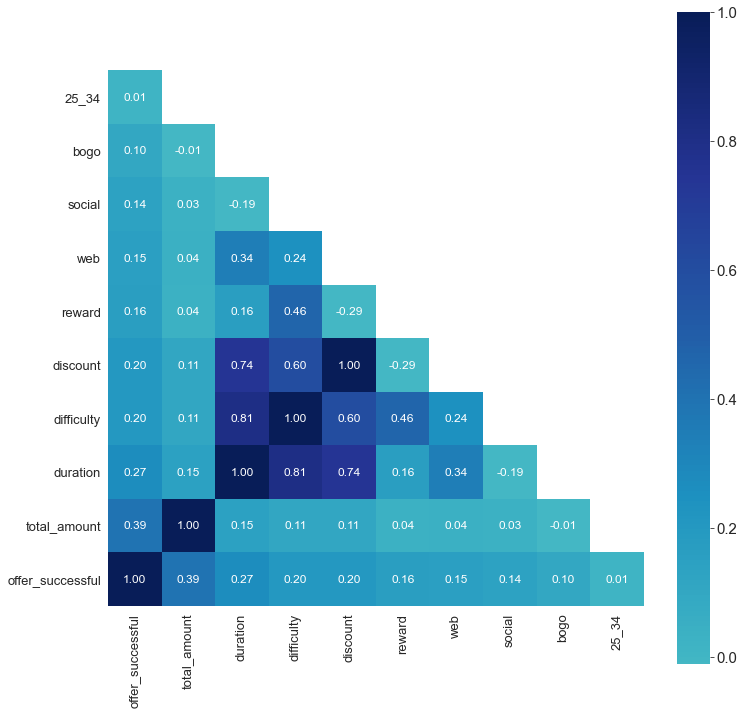

In [269]:
# Heatmap
corr = num.corr().sort_values('offer_successful', axis=1, ascending=False). \
       sort_values('offer_successful', axis=0, ascending=False).iloc[:10,:10]
corr = corr.sort_values('offer_successful', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.total_amount.min(), 
                     vmax=corr.drop(['offer_successful'], axis=0).total_amount.max(), center=0, 
                     square=True, annot=True, fmt='.2f',cmap='YlGnBu',annot_kws={"size": 12})

# Increase tick label size
ax.tick_params(labelsize=13)

**Observations:** Numerical variables show similarly high correlations such as:
- `total_amount`, `duration`, `difficulty`

Other numerical variables show a less positive correlation to `total_amount` spent such as:
- `social`, `bogo`, `25_34`

<a id='4'></a>
## 4. Modelling

The first step in a Modelling process is to split our data into training and testing data. Generally, the rule of thumb is to divide the data in a way that variance is not too high with either training or testing data. However, 80/20 is a good starting point to start tweaking from.

**Reference:** https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio

<a id='4.1'></a>
### 4.1. Pre-processing

**We will split our data into training and testing sets by using these variables:**

**`X_train`** - includes the independent variables used to train the model. Since we have also specified the test_size = 0.2, this means 80% of observations from the complete dataset will be used to train/fit the model. The remaining 20% will be used to test the model.

**`X_test`** - the remaining 20% portion of the independent variables from the dataset which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

**`y_train`** - includes a dependent variable which needs to be predicted by the model. This will include category labels against our independent variables, but we need to specify our dependent variable while training/fitting the model.

**`y_test`** - includes category labels for our test data, these labels will be used to test the accuracy between actual and predicted categories.

**References:** 
1. https://scikit-learn.org/stable/modules/preprocessing.html
2. https://realpython.com/train-test-split-python-data/
3. https://stackoverflow.com/questions/56212429/how-to-remerge-the-x-test-and-the-y-test-the-x-train-and-the-y-train-after-spl
4. https://www.geeksforgeeks.org/python-pandas-series-ravel/
5. https://www.youtube.com/watch?v=5bHpPQ6_OU4&ab_channel=Simplilearn

In [89]:
# Dependent variable name string
class_label_name = 'offer_successful'

# Dependent variable
label = clean_data.filter([class_label_name])

# Independent variables
variables = clean_data.drop(columns=[class_label_name])

# Create a random_state to produce consistent testing results
random_state = 42

# Restore features
features = variables.iloc[:,2:] 

# Removes features
drop = ['reward', 'bogo', 'discount', 
        'mobile', 'social', 'web']

# Drop or retain columns using this loop to test features
for drops in drop:
    features = features.drop(drops, axis=1)

#### Feature Selection

In [90]:
variables.columns[2:]

Index(['difficulty', 'duration', 'reward', 'bogo', 'discount', 'mobile',
       'social', 'web', 'female', 'male', 'other', 'income', 'income_1',
       'income_2', 'income_3', 'income_4', 'income_5', '18_24', '25_34',
       '35_44', '45_54', '55_64', '65_74', '75_84', '85_94', '95_104', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [91]:
# Independent variables
features.columns

Index(['difficulty', 'duration', 'female', 'male', 'other', 'income',
       'income_1', 'income_2', 'income_3', 'income_4', 'income_5', '18_24',
       '25_34', '35_44', '45_54', '55_64', '65_74', '75_84', '85_94', '95_104',
       '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [92]:
# Count features
original_features = variables.columns[2:]
current_features = features.columns
print(style.BOLD + 'Original feature count:', len(original_features), style.END)
print(original_features, '\n')
print(style.BOLD + 'Current features count:', len(current_features), style.END)
print(current_features)

Original feature count: 32 
Index(['difficulty', 'duration', 'reward', 'bogo', 'discount', 'mobile',
       'social', 'web', 'female', 'male', 'other', 'income', 'income_1',
       'income_2', 'income_3', 'income_4', 'income_5', '18_24', '25_34',
       '35_44', '45_54', '55_64', '65_74', '75_84', '85_94', '95_104', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object') 

Current features count: 26 
Index(['difficulty', 'duration', 'female', 'male', 'other', 'income',
       'income_1', 'income_2', 'income_3', 'income_4', 'income_5', '18_24',
       '25_34', '35_44', '45_54', '55_64', '65_74', '75_84', '85_94', '95_104',
       '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')


#### Split data into random train and test subsets

In [93]:
# Split data into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(variables.values,
                                                    label.values,
                                                    test_size=0.4,
                                                    train_size=0.6,
                                                    random_state=random_state)

In [94]:
# Return y_train array
y_train

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [95]:
# Ravel y_train and y_test to one-dimentional array
y_train = y_train.ravel()
y_test = y_test.ravel()

# Return the flattened array
y_train

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [96]:
# Filter `offer_id` and `total_amount` from columns
variable_names = variables.columns[2:]

# Modify train variables
offer_id_train = X_train[:, 0]
total_amount_train = X_train[:, 1]
X_train = X_train[:, 2:].astype('float64')

# Modify test variables
offer_id_test = X_test[:, 0]
total_amount_test = X_test[:, 1]
X_test = X_test[:, 2:].astype('float64')

# Create X,y variables by merging train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

In [97]:
X_train.shape

(40869, 32)

**References:** 
1. https://www.geeksforgeeks.org/python-pandas-series-ravel/
2. https://numpy.org/doc/stable/reference/generated/numpy.r_.html

In [98]:
# Create a DataFrame for training customer data
train_offer = pd.DataFrame(offer_id_train, columns=['offer_id'])
train_variables = pd.DataFrame(X_train, columns=variable_names)
train_labels = pd.DataFrame(y_train, columns=[class_label_name])

training_data = pd.concat([train_offer,
                           train_variables,
                           train_labels], axis=1)

training_data = training_data.drop(columns=['difficulty',
                                            'duration',
                                            'reward',
                                            'bogo',
                                            'discount',
                                            'mobile',
                                            'social',
                                            'web'])

# Create a verbose version of clean_data with age, etc
training_data_verbose = pd.merge(left=training_data.copy(), right=clean_verbose)

# Print
training_data.head()

,offer_id,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful
0,1.0,1.0,0.0,0.0,72000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,9.0,0.0,1.0,0.0,84000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,5.0,0.0,1.0,0.0,34000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,8.0,1.0,0.0,0.0,101000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,5.0,0.0,1.0,0.0,46000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


<a id='4.2'></a>
### 4.2. Designing Tests

The test in this task is the test that we will use to determine how well our model works. It may be as simple as splitting our data into a group of cases for model training and another group for model testing. Training data is used to fit mathematical forms to the data model, and test data is used during the model-training process to avoid overfitting: making a model that’s perfect for one dataset, but no other. We can also use holdout data, data that is not used during the model-training process, for an additional test. The deliverable for this task is our test design. It may not be elaborate, but
we must make our training and test data are similar and avoid introducing any bias into the data.

<a id='4.21'></a>
### 4.21. Feature Scaling

In [99]:
# Variables to scale
scale_variables = ['difficulty', 'duration', 'reward', 'income']

min_max_scaler = {}

for idx in range(len(scale_variables)):
    # Filter variables by using their names
    column_idx = np.argwhere(variable_names == scale_variables[idx])[0, 0]
    
    # Define new variable
    column = scale_variables[idx]
    
    # Scale selected column
    min_max_scaler[column] = MinMaxScaler()
    min_max_scaler[column].fit(X_train[:, column_idx].reshape(-1, 1))

    # Scale values for X_train
    transformed_values = min_max_scaler[column].transform(
                         X_train[:, column_idx].reshape(-1, 1))

    # Transform X_train
    X_train[:, column_idx] = transformed_values.reshape(1, -1)
    
    # Scale values for X_test
    transformed_values = min_max_scaler[column].transform(
                         X_test[:, column_idx].reshape(-1, 1))
    
    # Transform X_test
    X_test[:, column_idx] = transformed_values.reshape(1, -1)

<a id='4.22'></a>
### 4.22. Exploratory Data Analysis

We can analyse the success of each offer below.

#### Overall Offer Statistics

In [100]:
# Count successful offers
success_count = clean_data[['offer_id', 'offer_successful']].groupby('offer_id').sum().reset_index()
success_count

,offer_id,offer_successful
0,1,3482
1,2,3185
2,3,655
3,4,3226
4,5,2957
5,6,4601
6,7,4815
7,8,533
8,9,3879
9,10,3126


In [101]:
# Count total offers
offer_count = clean_data['offer_id'].value_counts()
offer_count

5     6874
1     6862
4     6855
10    6855
8     6812
3     6796
6     6788
9     6784
7     6756
2     6733
Name: offer_id, dtype: int64

In [102]:
# Create df from value counts then sort by offer_id
offer_count = offer_count.reset_index()
offer_count = offer_count.rename(columns={'index':'offer_id', 
                                          'offer_id':'count'}).sort_values('offer_id')
offer_count

,offer_id,count
1,1,6862
9,2,6733
5,3,6796
2,4,6855
0,5,6874
6,6,6788
8,7,6756
4,8,6812
7,9,6784
3,10,6855


In [103]:
# Merge offer_success and offer_count
pct_success = pd.merge(offer_count, success_count, on="offer_id")
pct_success

,offer_id,count,offer_successful
0,1,6862,3482
1,2,6733,3185
2,3,6796,655
3,4,6855,3226
4,5,6874,2957
5,6,6788,4601
6,7,6756,4815
7,8,6812,533
8,9,6784,3879
9,10,6855,3126


In [104]:
# Calculate success percentage
pct_success['percent_success'] = 100 * pct_success['offer_successful'] / pct_success['count']
pct_success

,offer_id,count,offer_successful,percent_success
0,1,6862,3482,50.743224
1,2,6733,3185,47.304322
2,3,6796,655,9.638022
3,4,6855,3226,47.060540
4,5,6874,2957,43.017166
5,6,6788,4601,67.781379
6,7,6756,4815,71.269982
7,8,6812,533,7.824427
8,9,6784,3879,57.178656
9,10,6855,3126,45.601751


In [105]:
# Merge portfolio with pct_success
pct_success = pd.merge(pct_success,
                       portfolio_new,
                       on='offer_id')
pct_success = pct_success.drop(columns=['offer_successful']) \
              .sort_values('percent_success', ascending=False)
pct_success

,offer_id,count,percent_success,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
6,7,6756,71.269982,10,10,2,0,1,0,1,1,1,1
5,6,6788,67.781379,7,7,3,0,1,0,1,1,1,1
8,9,6784,57.178656,5,5,5,1,0,0,1,1,1,1
0,1,6862,50.743224,10,7,10,1,0,0,1,1,1,0
1,2,6733,47.304322,10,5,10,1,0,0,1,1,1,1
3,4,6855,47.060540,5,7,5,1,0,0,1,1,0,1
9,10,6855,45.601751,10,7,2,0,1,0,1,1,0,1
4,5,6874,43.017166,20,10,5,0,1,0,1,0,0,1
2,3,6796,9.638022,0,4,0,0,0,1,1,1,0,1
7,8,6812,7.824427,0,3,0,0,0,1,1,1,1,0


In [106]:
pct_success.sort_values('percent_success', ascending=False)

,offer_id,count,percent_success,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
6,7,6756,71.269982,10,10,2,0,1,0,1,1,1,1
5,6,6788,67.781379,7,7,3,0,1,0,1,1,1,1
8,9,6784,57.178656,5,5,5,1,0,0,1,1,1,1
0,1,6862,50.743224,10,7,10,1,0,0,1,1,1,0
1,2,6733,47.304322,10,5,10,1,0,0,1,1,1,1
3,4,6855,47.060540,5,7,5,1,0,0,1,1,0,1
9,10,6855,45.601751,10,7,2,0,1,0,1,1,0,1
4,5,6874,43.017166,20,10,5,0,1,0,1,0,0,1
2,3,6796,9.638022,0,4,0,0,0,1,1,1,0,1
7,8,6812,7.824427,0,3,0,0,0,1,1,1,1,0


In [107]:
clean_data.head()

,offer_id,total_amount,offer_successful,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,4,37.67,1,5,7,5,1,0,1,0,1,1,0,0,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,8,0.00,0,0,3,0,0,0,1,1,0,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,8,32.90,0,0,3,0,0,0,1,1,0,0,1,0,66000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,5,0.00,0,20,10,5,0,1,0,0,1,1,0,0,50000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,8,0.00,0,0,3,0,0,0,1,1,0,0,1,0,94000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


# Training Data Verbose Start (Duplicated below with training df). Find out what it belongs to)

In [108]:
# Compute the value of the relevant boolean conditions
income_1 = clean_data['income_1'] == 1
income_2 = clean_data['income_2'] == 1
income_3 = clean_data['income_3'] == 1
income_4 = clean_data['income_4'] == 1
income_5 = clean_data['income_5'] == 1

# Create categorical series data
cat = pd.Series(pd.Categorical([np.nan] * len(clean_data),
                                categories=['income_1', 'income_2', 
                                            'income_3', 'income_4',
                                            'income_5']),
                                index=clean_data.index)

# Create labels
cat[income_1] = 'income_1'
cat[income_2] = 'income_2'
cat[income_3] = 'income_3'
cat[income_4] = 'income_4'
cat[income_5] = 'income_5'

# Assign to new column
clean_data['income_group'] = cat

In [109]:
clean_data.head()

,offer_id,total_amount,offer_successful,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,income_group
0,4,37.67,1,5,7,5,1,0,1,0,1,1,0,0,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,income_5
1,8,0.00,0,0,3,0,0,0,1,1,0,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,income_3
2,8,32.90,0,0,3,0,0,0,1,1,0,0,1,0,66000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,income_3
3,5,0.00,0,20,10,5,0,1,0,0,1,1,0,0,50000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,income_2
4,8,0.00,0,0,3,0,0,0,1,1,0,0,1,0,94000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,income_5


In [110]:
# This is a function with the purpose of splitting the income and age groups for offer EDA
def offer_success_count(col_list):
    '''This function filters the offer success DataFrame
    depending on the input column. The output will be used
    for the offer success EDA (Exploratory Data Analysis).
    
    INPUT:
    col_list - list of columns of DataFrame containing input 
    features (str)
    
    OUTPUT:
    df - DataFrame with successful offer 
    '''
    
    # Default columns
    cols = ['offer_id', 'offer_successful']
    
    # Join input columns
    cols.extend(col_list)
    
    # Count successful offers
    successful_df = clean_data[clean_data['offer_successful'] == 1]

    # Count unsuccessful offers
    unsuccessful_df = clean_data[clean_data['offer_successful'] == 0]

    # Count successful offers per category
    success_count = successful_df[cols]. \
                                   groupby('offer_id').sum().reset_index()

    # Count unsuccessful offers per category
    unsuccess_count = unsuccessful_df[cols]. \
                                       groupby('offer_id').sum().reset_index()
    
    # Split output dfs using [0] or [1], etc
    return success_count, unsuccess_count

# Complete Function

In [111]:
clean_data.columns

Index(['offer_id', 'total_amount', 'offer_successful', 'difficulty',
       'duration', 'reward', 'bogo', 'discount', 'mobile', 'social', 'web',
       'female', 'male', 'other', 'income', 'income_1', 'income_2', 'income_3',
       'income_4', 'income_5', '18_24', '25_34', '35_44', '45_54', '55_64',
       '65_74', '75_84', '85_94', '95_104', '2013', '2014', '2015', '2016',
       '2017', '2018', 'income_group'],
      dtype='object')

In [112]:
input_cols = ['income_1', 'income_2', 'income_3', 'income_4', 'income_5', 
              'male', 'female', 'other', '18_24', '25_34', '35_44', '45_54', 
              '55_64', '65_74', '75_84', '85_94', '95_104', '2013', '2014', 
              '2015', '2016','2017', '2018']
offer_success_func = offer_success_count(input_cols)

# Copy dfs to prevent overwriting column names
success_count1 = offer_success_func[0].copy()
unsuccess_count1 = offer_success_func[1].copy()

In [113]:
success_count1

,offer_id,offer_successful,income_1,income_2,income_3,income_4,income_5,male,female,other,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857
1,2,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814
2,3,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172
3,4,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793
4,5,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712
5,6,4601,920,896,952,902,931,2592,1940,69,289,436,559,875,1074,788,404,156,20,84,217,491,945,1742,1122
6,7,4815,929,950,980,961,995,2764,1977,74,305,454,652,922,1094,789,434,149,16,92,203,549,960,1798,1213
7,8,533,86,93,110,123,121,307,216,10,35,45,52,112,135,90,45,18,1,9,29,57,118,185,135
8,9,3879,804,671,802,801,801,2252,1563,64,235,380,464,789,918,646,298,132,17,65,170,418,779,1499,948
9,10,3126,603,560,664,671,628,1783,1294,49,183,306,382,641,693,515,277,119,10,45,128,332,645,1211,765


In [114]:
unsuccess_count1

,offer_id,offer_successful,income_1,income_2,income_3,income_4,income_5,male,female,other,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,0,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840
1,2,0,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868
2,3,0,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536
3,4,0,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930
4,5,0,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008
5,6,0,407,446,468,446,420,1275,889,23,112,198,280,491,513,364,149,73,7,36,103,245,442,817,544
6,7,0,346,335,418,430,412,1102,812,27,95,155,256,402,492,320,157,57,7,42,87,179,422,719,492
7,8,0,1206,1254,1310,1229,1280,3663,2545,71,365,582,780,1246,1440,1121,512,199,34,134,313,661,1261,2386,1524
8,9,0,553,515,635,606,596,1666,1199,40,179,244,349,591,664,527,240,93,18,63,139,309,633,1036,725
9,10,0,748,698,767,770,746,2107,1568,54,195,305,537,772,859,626,289,130,16,72,162,404,750,1411,930


In [115]:
# Function for appending columns with strings
def rename_offer_success(string):
    '''This function appends strings to a list used to rename 
    the columns in the offer success DataFrame. The output 
    will return a list.
    
    INPUT:
    string - string used to append selected columns (str)
    
    OUTPUT:
    rename_cols - list with column titles 
    '''
    
    # Base columns
    cols = list(offer_success_func[0].columns)
    rename_cols = cols[:2]

    # Append input columns
    for i in range(len(cols[2:])):
        c = cols[2:][i] + string
        rename_cols.append(c)

    return rename_cols

In [116]:
# Function to skip previously appended columns
def rename_success_count(df, substring):
    '''This function appends columns with an _s (successful)
    or _u (unsuccessful) depending on the DataFrame to prepare
    them for merging.
    
    INPUT:
    df - DataFrame to perform operations on
    substring - string used to append selected columns (str)
    
    OUTPUT:
    df.columns - list with column titles 
    '''

    # Normal columns as a list type
    norm_cols = list(offer_success_func[0].columns)

    # Skipping operation if string found
    if search(substring, norm_cols[2]):
        print('Existing string found!')
    else:
        df.columns = rename_offer_success(substring)

    return df.columns

**References:**
1. https://stackabuse.com/python-check-if-string-contains-substring/

In [117]:
# Count unsuccessful offers and create columns
success_count1.columns = rename_success_count(success_count1, '_s')
unsuccess_count1.columns = rename_success_count(unsuccess_count1, '_u')

In [118]:
# Merge dfs together
success_df1 = pd.merge(success_count1, unsuccess_count1.drop(columns='offer_successful'), on='offer_id')
success_df1 = pd.merge(offer_count, success_df1, on='offer_id')
success_df1

,offer_id,count,offer_successful,income_1_s,income_2_s,income_3_s,income_4_s,income_5_s,male_s,female_s,other_s,18_24_s,25_34_s,35_44_s,45_54_s,55_64_s,65_74_s,75_84_s,85_94_s,95_104_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,income_1_u,income_2_u,income_3_u,income_4_u,income_5_u,male_u,female_u,other_u,18_24_u,25_34_u,35_44_u,45_54_u,55_64_u,65_74_u,75_84_u,85_94_u,95_104_u,2013_u,2014_u,2015_u,2016_u,2017_u,2018_u
0,1,6862,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840
1,2,6733,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868
2,3,6796,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536
3,4,6855,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930
4,5,6874,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008
5,6,6788,4601,920,896,952,902,931,2592,1940,69,289,436,559,875,1074,788,404,156,20,84,217,491,945,1742,1122,407,446,468,446,420,1275,889,23,112,198,280,491,513,364,149,73,7,36,103,245,442,817,544
6,7,6756,4815,929,950,980,961,995,2764,1977,74,305,454,652,922,1094,789,434,149,16,92,203,549,960,1798,1213,346,335,418,430,412,1102,812,27,95,155,256,402,492,320,157,57,7,42,87,179,422,719,492
7,8,6812,533,86,93,110,123,121,307,216,10,35,45,52,112,135,90,45,18,1,9,29,57,118,185,135,1206,1254,1310,1229,1280,3663,2545,71,365,582,780,1246,1440,1121,512,199,34,134,313,661,1261,2386,1524
8,9,6784,3879,804,671,802,801,801,2252,1563,64,235,380,464,789,918,646,298,132,17,65,170,418,779,1499,948,553,515,635,606,596,1666,1199,40,179,244,349,591,664,527,240,93,18,63,139,309,633,1036,725
9,10,6855,3126,603,560,664,671,628,1783,1294,49,183,306,382,641,693,515,277,119,10,45,128,332,645,1211,765,748,698,767,770,746,2107,1568,54,195,305,537,772,859,626,289,130,16,72,162,404,750,1411,930


# Iterate over each new column and calculate

In [119]:
success_df1

,offer_id,count,offer_successful,income_1_s,income_2_s,income_3_s,income_4_s,income_5_s,male_s,female_s,other_s,18_24_s,25_34_s,35_44_s,45_54_s,55_64_s,65_74_s,75_84_s,85_94_s,95_104_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,income_1_u,income_2_u,income_3_u,income_4_u,income_5_u,male_u,female_u,other_u,18_24_u,25_34_u,35_44_u,45_54_u,55_64_u,65_74_u,75_84_u,85_94_u,95_104_u,2013_u,2014_u,2015_u,2016_u,2017_u,2018_u
0,1,6862,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840
1,2,6733,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868
2,3,6796,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536
3,4,6855,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930
4,5,6874,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008
5,6,6788,4601,920,896,952,902,931,2592,1940,69,289,436,559,875,1074,788,404,156,20,84,217,491,945,1742,1122,407,446,468,446,420,1275,889,23,112,198,280,491,513,364,149,73,7,36,103,245,442,817,544
6,7,6756,4815,929,950,980,961,995,2764,1977,74,305,454,652,922,1094,789,434,149,16,92,203,549,960,1798,1213,346,335,418,430,412,1102,812,27,95,155,256,402,492,320,157,57,7,42,87,179,422,719,492
7,8,6812,533,86,93,110,123,121,307,216,10,35,45,52,112,135,90,45,18,1,9,29,57,118,185,135,1206,1254,1310,1229,1280,3663,2545,71,365,582,780,1246,1440,1121,512,199,34,134,313,661,1261,2386,1524
8,9,6784,3879,804,671,802,801,801,2252,1563,64,235,380,464,789,918,646,298,132,17,65,170,418,779,1499,948,553,515,635,606,596,1666,1199,40,179,244,349,591,664,527,240,93,18,63,139,309,633,1036,725
9,10,6855,3126,603,560,664,671,628,1783,1294,49,183,306,382,641,693,515,277,119,10,45,128,332,645,1211,765,748,698,767,770,746,2107,1568,54,195,305,537,772,859,626,289,130,16,72,162,404,750,1411,930


In [120]:
# Append input columns
rename_cols = []

variable_list = list(success_df1.iloc[:, 3:].columns)
for i in range(len(variable_list)):
    # Rename columns in list
    s = success_df1.iloc[:, 3:].columns[i]  + '%'
    rename_cols.append(s)

In [121]:
success_df1.columns

Index(['offer_id', 'count', 'offer_successful', 'income_1_s', 'income_2_s',
       'income_3_s', 'income_4_s', 'income_5_s', 'male_s', 'female_s',
       'other_s', '18_24_s', '25_34_s', '35_44_s', '45_54_s', '55_64_s',
       '65_74_s', '75_84_s', '85_94_s', '95_104_s', '2013_s', '2014_s',
       '2015_s', '2016_s', '2017_s', '2018_s', 'income_1_u', 'income_2_u',
       'income_3_u', 'income_4_u', 'income_5_u', 'male_u', 'female_u',
       'other_u', '18_24_u', '25_34_u', '35_44_u', '45_54_u', '55_64_u',
       '65_74_u', '75_84_u', '85_94_u', '95_104_u', '2013_u', '2014_u',
       '2015_u', '2016_u', '2017_u', '2018_u'],
      dtype='object')

In [122]:
# Iterate through columns in list
for i in range(len(variable_list)):
    # For each variable
    success_df1[variable_list[i] + '%'] = 100 * success_df1[variable_list[i]] / success_df1['offer_successful']
    success_df1[variable_list[i] + '%'] = 100 * success_df1[variable_list[i]] / (success_df1['count'] - success_df1['offer_successful'])
    
# Create 2 new columns
success_df1['percent_success'] = 100 * success_df1['offer_successful'] / success_df1['count']
success_df1['success_dist'] = (success_df1['offer_successful'] / success_df1['offer_successful'].sum()) * 100

In [123]:
success_df1

,offer_id,count,offer_successful,income_1_s,income_2_s,income_3_s,income_4_s,income_5_s,male_s,female_s,other_s,18_24_s,25_34_s,35_44_s,45_54_s,55_64_s,65_74_s,75_84_s,85_94_s,95_104_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,income_1_u,income_2_u,income_3_u,income_4_u,income_5_u,male_u,female_u,other_u,18_24_u,25_34_u,35_44_u,45_54_u,55_64_u,65_74_u,75_84_u,85_94_u,95_104_u,2013_u,2014_u,2015_u,2016_u,2017_u,2018_u,income_1_s%,income_2_s%,income_3_s%,income_4_s%,income_5_s%,male_s%,female_s%,other_s%,18_24_s%,25_34_s%,35_44_s%,45_54_s%,55_64_s%,65_74_s%,75_84_s%,85_94_s%,95_104_s%,2013_s%,2014_s%,2015_s%,2016_s%,2017_s%,2018_s%,income_1_u%,income_2_u%,income_3_u%,income_4_u%,income_5_u%,male_u%,female_u%,other_u%,18_24_u%,25_34_u%,35_44_u%,45_54_u%,55_64_u%,65_74_u%,75_84_u%,85_94_u%,95_104_u%,2013_u%,2014_u%,2015_u%,2016_u%,2017_u%,2018_u%,percent_success,success_dist
0,1,6862,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840,20.088757,19.201183,21.242604,19.822485,22.662722,58.136095,43.402367,1.479290,5.739645,10.295858,12.781065,20.207101,25.473373,16.715976,7.958580,3.343195,0.502959,1.568047,4.349112,11.538462,21.952663,38.254438,25.355030,17.721893,18.017751,22.633136,20.917160,20.710059,58.431953,40.384615,1.183432,5.088757,9.319527,12.751479,20.857988,22.958580,17.011834,8.254438,3.224852,0.532544,1.982249,4.319527,10.029586,21.094675,37.721893,24.852071,50.743224,11.431761
1,2,6733,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868,17.784667,17.333709,18.912063,18.094701,17.643743,52.564825,35.653890,1.550169,6.200676,8.990981,10.794814,17.671928,21.251409,14.233371,7.271702,3.072153,0.281849,1.691094,4.199549,9.131905,17.671928,34.131905,22.942503,19.334837,18.883878,20.913191,20.913191,19.954904,57.497182,41.178129,1.324690,5.636979,8.737317,13.190530,21.054115,21.899662,17.136415,8.737317,3.297632,0.310034,2.282976,4.396843,11.330327,20.462232,37.063134,24.464487,47.304322,10.456679
2,3,6796,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536,1.840091,1.742387,2.410031,2.589155,2.084351,5.845953,4.657222,0.162840,0.700212,0.993324,1.530695,2.019215,2.768279,1.351571,0.928188,0.293112,0.081420,0.179124,0.455952,1.172447,2.116919,3.940726,2.800847,19.394235,19.426803,20.420127,21.201759,19.557075,56.782283,41.849862,1.367855,6.546165,9.053900,12.099007,20.745807,23.790914,15.828041,8.044292,3.452206,0.439668,1.726103,4.559518,10.112360,21.299463,37.290344,25.012213,9.638022,2.150432
3,4,6855,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930,17.635712,16.781483,19.206393,17.883715,17.387710,50.316892,37.117663,1.460457,4.960044,8.707633,11.049876,18.572610,20.584183,13.557454,7.688068,3.361808,0.413337,1.488013,3.802700,9.837421,17.222375,34.692753,21.851750,19.840176,18.655277,20.721962,20.336181,20.446404,55.717829,42.766602,1.515569,5.869386,9.616974,13.171673,20.914853,22.320198,15.817029,8.487187,3.444475,0.358225,2.287131,4.271149,9.920088,20.198402,37.696335,25.626894,47.060540,10.591287
4,5,6874,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008,14.603013,14.041358,14.934899,15.675262,16.236916,42.532550,31.758999,1.199898,4.799592,6.995149,8.680112,15.037018,16.211386,14.092418,6.356906,2.808272,0.510595,1.327547,3.012510,8.731172,15.011488,29.231555,18.177176,18.866479,18.636712,20.423794,21.189686,20.883329,58.360991,40.311463,1

**Reference:** https://www.geeksforgeeks.org/iterate-over-a-list-in-python/

In [124]:
# Count successful offers
successful_df = clean_data[clean_data['offer_successful'] == 1]

# Count unsuccessful offers
unsuccessful_df = clean_data[clean_data['offer_successful'] == 0]

# Count successful offers per category
success_count = successful_df[['offer_id', 'offer_successful', 
                            'male', 'female', 'other']]. \
                             groupby('offer_id').sum().reset_index()

# Count unsuccessful offers per category
unsuccess_count = unsuccessful_df[['offer_id', 'offer_successful', 
                            'male', 'female', 'other']]. \
                             groupby('offer_id').sum().reset_index()

success_count

,offer_id,offer_successful,male,female,other
0,1,3482,1965,1467,50
1,2,3185,1865,1265,55
2,3,655,359,286,10
3,4,3226,1826,1347,53
4,5,2957,1666,1244,47
5,6,4601,2592,1940,69
6,7,4815,2764,1977,74
7,8,533,307,216,10
8,9,3879,2252,1563,64
9,10,3126,1783,1294,49


In [125]:
# Count unsuccessful offers and create columns
unsuccess_count = unsuccess_count.rename(columns={'male':'male_u', 'female':'female_u', 'other':'other_u'})
success_df = pd.merge(success_count, unsuccess_count.drop(columns='offer_successful'), on='offer_id')
success_df = pd.merge(offer_count, success_df, on='offer_id')
success_df

,offer_id,count,offer_successful,male,female,other,male_u,female_u,other_u
0,1,6862,3482,1965,1467,50,1975,1365,40
1,2,6733,3185,1865,1265,55,2040,1461,47
2,3,6796,655,359,286,10,3487,2570,84
3,4,6855,3226,1826,1347,53,2022,1552,55
4,5,6874,2957,1666,1244,47,2286,1579,52
5,6,6788,4601,2592,1940,69,1275,889,23
6,7,6756,4815,2764,1977,74,1102,812,27
7,8,6812,533,307,216,10,3663,2545,71
8,9,6784,3879,2252,1563,64,1666,1199,40
9,10,6855,3126,1783,1294,49,2107,1568,54


In [126]:
# Calculate success percentage
success_df['male_%'] = 100 * success_df['male'] / success_df['offer_successful']
success_df['male_u%'] = 100 * success_df['male_u'] / (success_df['count'] - success_df['offer_successful'])
success_df['female_%'] = 100 * success_df['female'] / success_df['offer_successful']
success_df['female_u%'] = 100 * success_df['female_u'] / (success_df['count'] - success_df['offer_successful'])
success_df['other_%'] = 100 * success_df['other'] / success_df['offer_successful']
success_df['other_u%'] = 100 * success_df['other_u'] / (success_df['count'] - success_df['offer_successful'])
success_df['percent_success'] = 100 * success_df['offer_successful'] / success_df['count']
success_df['success_dist'] = (success_df['offer_successful'] / success_df['offer_successful'].sum()) * 100
success_df

,offer_id,count,offer_successful,male,female,other,male_u,female_u,other_u,male_%,male_u%,female_%,female_u%,other_%,other_u%,percent_success,success_dist
0,1,6862,3482,1965,1467,50,1975,1365,40,56.433084,58.431953,42.130959,40.384615,1.435956,1.183432,50.743224,11.431761
1,2,6733,3185,1865,1265,55,2040,1461,47,58.555730,57.497182,39.717425,41.178129,1.726845,1.324690,47.304322,10.456679
2,3,6796,655,359,286,10,3487,2570,84,54.809160,56.782283,43.664122,41.849862,1.526718,1.367855,9.638022,2.150432
3,4,6855,3226,1826,1347,53,2022,1552,55,56.602604,55.717829,41.754495,42.766602,1.642901,1.515569,47.060540,10.591287
4,5,6874,2957,1666,1244,47,2286,1579,52,56.340886,58.360991,42.069665,40.311463,1.589449,1.327547,43.017166,9.708132
5,6,6788,4601,2592,1940,69,1275,889,23,56.335579,58.299040,42.164747,40.649291,1.499674,1.051669,67.781379,15.105552
6,7,6756,4815,2764,1977,74,1102,812,27,57.403946,56.774858,41.059190,41.834106,1.536864,1.391036,71.269982,15.808136
7,8,6812,533,307,216,10,3663,2545,71,57.598499,58.337315,40.525328,40.531932,1.876173,1.130753,7.824427,1.749893
8,9,6784,3879,2252,1563,64,1666,1199,40,58.056200,57.349398,40.293890,41.273666,1.649910,1.376936,57.178656,12.735152
9,10,6855,3126,1783,1294,49,2107,1568,54,57.037748,56.503084,41.394754,42.048807,1.567498,1.448109,45.601751,10.262976


**Reference:** - Calculate the percentage of a column https://www.geeksforgeeks.org/how-to-calculate-the-percentage-of-a-column-in-pandas/

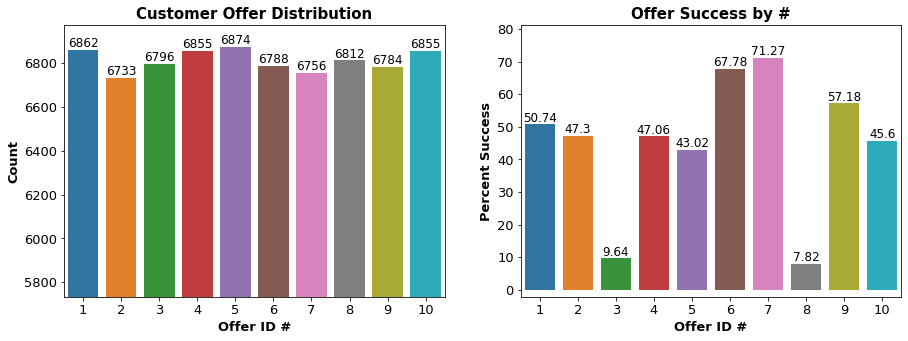

In [127]:
# Offer pct_success plot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Data
pct_sort = pct_success.sort_values('percent_success', ascending=False)

# Plots
ax1 = sns.barplot(ax=axes[0], data=pct_success, x='offer_id', y='count')
ax2 = sns.barplot(ax=axes[1], data=pct_success, x='offer_id', y=pct_success['percent_success'].round(2))

# Style plot
ax1.set(ylim=(pct_success['count'].min() - 1000, pct_success['count'].max() + 100))
ax2.set(ylim=(pct_success['percent_success'].min() - 10, pct_success['percent_success'].max() + 10))
ax1.bar_label(ax1.containers[0], size=12); ax2.bar_label(ax2.containers[0], size=12)
style_sns_2('Customer Offer Distribution', 'Offer Success by #', 
            'Offer ID #', 'Count', 'Offer ID #', 'Percent Success')

**Observation:** The results show quite an even distribution of offer success. However, things change for the last two results which are informational offers with just 9.6% and 7.8% offer success rates accordingly.

**References:** 
1. Seaborn Barplot Display Values: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
2. Set Axis Limits: https://www.kite.com/python/answers/how-to-set-axis-limits-in-a-seaborn-lmplot-facetgrid-in-python
3. Annotate Bar Label: https://datavizpyr.com/annotate-barplot-with-bar_label-in-matplotlib/

#### Customer Offer Statistics

In [128]:
# Create a dataframe for offer_id n
cols = ['user_id', 'offer_id', 'offer_successful', 'income', 
        'income_1', 'income_2', 'income_3', 'income_4', 'income_5',
        'female', 'male', 'other', 'age', '18_24', '25_34', '35_44', 
        '45_54', '55_64', '65_74', '75_84', '85_94', '95_104', 
        '2013', '2014', '2015', '2016', '2017', '2018']

offer_1 = clean_verbose[cols][clean_verbose['offer_id'] == 1]
offer_2 = clean_verbose[cols][clean_verbose['offer_id'] == 2]
offer_3 = clean_verbose[cols][clean_verbose['offer_id'] == 3]
offer_4 = clean_verbose[cols][clean_verbose['offer_id'] == 4]
offer_5 = clean_verbose[cols][clean_verbose['offer_id'] == 5]
offer_6 = clean_verbose[cols][clean_verbose['offer_id'] == 6]
offer_7 = clean_verbose[cols][clean_verbose['offer_id'] == 7]
offer_8 = clean_verbose[cols][clean_verbose['offer_id'] == 8]
offer_9 = clean_verbose[cols][clean_verbose['offer_id'] == 9]
offer_10 = clean_verbose[cols][clean_verbose['offer_id'] == 10]

In [129]:
def offer_probability(df, col):
    '''This function calculates probability of a customer accepting 
    an offer based on a single input feature
    
    INPUT:
    df - DataFrame containing records of a specific offer_id
    col - column of DataFrame containing an input feature
    
    OUTPUT:
    p_result - a string including probability of the offer 
    being successful and unsuccessful 
    '''
    
    # Add count column for calculations
    df['count'] = 1
    
    # Pivot table to perform operations
    pb_df = \
    pd.pivot_table(df, 
    values='count', 
    index=['offer_successful'], 
    columns=[col], 
    aggfunc=np.size,
    fill_value=0)
    
    # Calculating probability
    p00, p01, p10, p11 = pb_df.iloc[0,0], pb_df.iloc[0,1], \
                         pb_df.iloc[1,0], pb_df.iloc[1,1]
    
    # Probability of an offer being successful
    Pa = (p10 + p11) / (p10 + p11 + p00 + p01)
    Pb = (p01 + p11) / (p10 + p11 + p00 + p01)
    Panb = p11 / (p10 + p11 + p00 + p01)

    # Probability of offers to males being successful
    p_result = Panb / Pb
    print('Probability of', pb_df.columns.name, pb_df.index.name, round(p_result *100, 2), '%')
    print('Probability of', pb_df.columns.name, 'offer_unsuccessful', round(100 - p_result *100, 2), '%')
    
    
def print_offer_probability(df):
    '''This function calculates probability of a customer accepting 
    an offer based on a single input feature

    INPUT:
    df - DataFrame containing records of a specific offer_id
    col - column of DataFrame containing an input feature

    OUTPUT:
    a list including probability of the offer 
    being successful and unsuccessful 
    '''

    # Loop through offer_probability to create results df
    unused_cols = ['male', 'female', 'other', 'income_1', 'income_2', 
            'income_3', 'income_4', 'income_5''18_24', '25_34', 
            '35_44', '45_54', '55_64', '65_74', '75_84', '85_94', 
            '95_104', '2013', '2014', '2015', '2016', '2017', '2018']

    # Select columns
    cols = ['male', 'female', 'other', '2013', '2014', '2015', 
            '2016', '2017', '2018']

    # Loop through the columns in offer_probability (no need to print twice)
    for idx in range(len(cols)):
        offer_probability(df, cols[idx]);

**Reference:** <br>
Conditional Probability with a Python Example https://towardsdatascience.com/conditional-probability-with-a-python-example-fd6f5937cd2

In [130]:
def offer_percentage(df, col):
    '''This function calculates the offer success percentage
    
    INPUT:
    df - DataFrame containing records of a specific offer_id
    col - column of DataFrame containing an input feature
    
    OUTPUT:
    print - a string including percentage of the offers 
    being successful and unsuccessful
    '''
    
    # Offer successful percentage of input col
    success = df[(df[col] == 1) & (df['offer_successful'] == 1)].shape[0] / df[col].sum()
    failed = df[(df[col] == 1) & (df['offer_successful'] == 0)].shape[0] / df[col].sum()

    # Print results
    print('Offer successful percentage for', col, round(success *100, 2), '%')
    print('Offer unsuccessful percentage for', col, round(failed *100, 2), '%')

In [131]:
def offer_demographics(df, offer, success):
    '''This function calculates demographics of a customer
    
    INPUT:
    df - DataFrame containing records of a specific offer_id
    offer - offer_id number (integer)
    success - determines if offer was successful. 1: yes, 0: no (integer)
    
    OUTPUT:
    print - mean of income and age for selected offer (float)
    '''
    
    # Filter selected offer
    cur_offer = df[(df['offer_id'] == offer) & (df['offer_successful'] == success)]
    
    # Drop duplicate user ids affecting the calculations
    cur_offer = cur_offer.drop_duplicates(subset='user_id')
    
    # Calculate mean
    cur_mean = cur_offer[['income', 'age']].mean()
    
    print(cur_mean)

#### Training Data Verbose Start

In [132]:
data_shape = print('Dataset Shape:', clean_data.shape)
training_shape = print('Training Shape:', training_data.shape)
training_split = print('Training Spilt:', training_data.shape[0]/clean_data.shape[0] * 100, '%')

Dataset Shape: (68115, 36)
Training Shape: (40869, 26)
Training Spilt: 60.0 %


In [133]:
training_data_verbose.head()

,offer_id,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful,user_id,time,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,member_days,age
0,1.0,1.0,0.0,0.0,72000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,10796,24,64.39,10,7,10,1,0,0,1,1,1,0,1360,70
1,9.0,0.0,1.0,0.0,84000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2264,0,1.78,5,5,5,1,0,0,1,1,1,1,2282,44
2,5.0,0.0,1.0,0.0,34000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,11867,17,70.03,20,10,5,0,1,0,1,0,0,1,1618,42
3,5.0,0.0,1.0,0.0,34000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,12743,14,37.37,20,10,5,0,1,0,1,0,0,1,1525,36
4,5.0,0.0,1.0,0.0,34000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,11867,17,70.03,20,10,5,0,1,0,1,0,0,1,1618,42


In [134]:
# Dataset is imbalanced 8 to 10 in favour of successful offers
clean_data[clean_data['offer_successful'] == 1].shape[0] / clean_data[clean_data['offer_successful'] == 0].shape[0]

0.8088750796685787

In [135]:
# Dataset is imbalanced 8.1 to 10 in favour of successful offers
training_data[training_data['offer_successful'] == 1] \
.shape[0] / training_data[training_data['offer_successful'] == 0].shape[0]

0.8094036392615221

In [136]:
# Dataset is imbalanced 7.3 to 10 in favour of successful offers
training_data_verbose[training_data_verbose['offer_successful'] == 1] \
.shape[0] / training_data_verbose[training_data_verbose['offer_successful'] == 0].shape[0]

0.7264545484961022

In [137]:
# Compute the value of the relevant boolean conditions
male = training_data['male'] == 1
female = training_data['female'] == 1
other = training_data['other'] == 1

# Create categorical series data
cat = pd.Series(pd.Categorical([np.nan] * len(training_data),
                                categories=['female', 'male', 'other']),
                                index=training_data.index)

# Create labels
cat[female] = 'female'
cat[male] = 'male'
cat[other] = 'other'

# Assign to new column
training_data['gender'] = cat

In [138]:
training_data_verbose.head()

,offer_id,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful,user_id,time,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,member_days,age
0,1.0,1.0,0.0,0.0,72000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,10796,24,64.39,10,7,10,1,0,0,1,1,1,0,1360,70
1,9.0,0.0,1.0,0.0,84000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2264,0,1.78,5,5,5,1,0,0,1,1,1,1,2282,44
2,5.0,0.0,1.0,0.0,34000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,11867,17,70.03,20,10,5,0,1,0,1,0,0,1,1618,42
3,5.0,0.0,1.0,0.0,34000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,12743,14,37.37,20,10,5,0,1,0,1,0,0,1,1525,36
4,5.0,0.0,1.0,0.0,34000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,11867,17,70.03,20,10,5,0,1,0,1,0,0,1,1618,42


#### Training Data Verbose Ends

In [139]:
success_df

,offer_id,count,offer_successful,male,female,other,male_u,female_u,other_u,male_%,male_u%,female_%,female_u%,other_%,other_u%,percent_success,success_dist
0,1,6862,3482,1965,1467,50,1975,1365,40,56.433084,58.431953,42.130959,40.384615,1.435956,1.183432,50.743224,11.431761
1,2,6733,3185,1865,1265,55,2040,1461,47,58.555730,57.497182,39.717425,41.178129,1.726845,1.324690,47.304322,10.456679
2,3,6796,655,359,286,10,3487,2570,84,54.809160,56.782283,43.664122,41.849862,1.526718,1.367855,9.638022,2.150432
3,4,6855,3226,1826,1347,53,2022,1552,55,56.602604,55.717829,41.754495,42.766602,1.642901,1.515569,47.060540,10.591287
4,5,6874,2957,1666,1244,47,2286,1579,52,56.340886,58.360991,42.069665,40.311463,1.589449,1.327547,43.017166,9.708132
5,6,6788,4601,2592,1940,69,1275,889,23,56.335579,58.299040,42.164747,40.649291,1.499674,1.051669,67.781379,15.105552
6,7,6756,4815,2764,1977,74,1102,812,27,57.403946,56.774858,41.059190,41.834106,1.536864,1.391036,71.269982,15.808136
7,8,6812,533,307,216,10,3663,2545,71,57.598499,58.337315,40.525328,40.531932,1.876173,1.130753,7.824427,1.749893
8,9,6784,3879,2252,1563,64,1666,1199,40,58.056200,57.349398,40.293890,41.273666,1.649910,1.376936,57.178656,12.735152
9,10,6855,3126,1783,1294,49,2107,1568,54,57.037748,56.503084,41.394754,42.048807,1.567498,1.448109,45.601751,10.262976


In [140]:
success_df1.head(5)

,offer_id,count,offer_successful,income_1_s,income_2_s,income_3_s,income_4_s,income_5_s,male_s,female_s,other_s,18_24_s,25_34_s,35_44_s,45_54_s,55_64_s,65_74_s,75_84_s,85_94_s,95_104_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,income_1_u,income_2_u,income_3_u,income_4_u,income_5_u,male_u,female_u,other_u,18_24_u,25_34_u,35_44_u,45_54_u,55_64_u,65_74_u,75_84_u,85_94_u,95_104_u,2013_u,2014_u,2015_u,2016_u,2017_u,2018_u,income_1_s%,income_2_s%,income_3_s%,income_4_s%,income_5_s%,male_s%,female_s%,other_s%,18_24_s%,25_34_s%,35_44_s%,45_54_s%,55_64_s%,65_74_s%,75_84_s%,85_94_s%,95_104_s%,2013_s%,2014_s%,2015_s%,2016_s%,2017_s%,2018_s%,income_1_u%,income_2_u%,income_3_u%,income_4_u%,income_5_u%,male_u%,female_u%,other_u%,18_24_u%,25_34_u%,35_44_u%,45_54_u%,55_64_u%,65_74_u%,75_84_u%,85_94_u%,95_104_u%,2013_u%,2014_u%,2015_u%,2016_u%,2017_u%,2018_u%,percent_success,success_dist
0,1,6862,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840,20.088757,19.201183,21.242604,19.822485,22.662722,58.136095,43.402367,1.479290,5.739645,10.295858,12.781065,20.207101,25.473373,16.715976,7.958580,3.343195,0.502959,1.568047,4.349112,11.538462,21.952663,38.254438,25.355030,17.721893,18.017751,22.633136,20.917160,20.710059,58.431953,40.384615,1.183432,5.088757,9.319527,12.751479,20.857988,22.958580,17.011834,8.254438,3.224852,0.532544,1.982249,4.319527,10.029586,21.094675,37.721893,24.852071,50.743224,11.431761
1,2,6733,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868,17.784667,17.333709,18.912063,18.094701,17.643743,52.564825,35.653890,1.550169,6.200676,8.990981,10.794814,17.671928,21.251409,14.233371,7.271702,3.072153,0.281849,1.691094,4.199549,9.131905,17.671928,34.131905,22.942503,19.334837,18.883878,20.913191,20.913191,19.954904,57.497182,41.178129,1.324690,5.636979,8.737317,13.190530,21.054115,21.899662,17.136415,8.737317,3.297632,0.310034,2.282976,4.396843,11.330327,20.462232,37.063134,24.464487,47.304322,10.456679
2,3,6796,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536,1.840091,1.742387,2.410031,2.589155,2.084351,5.845953,4.657222,0.162840,0.700212,0.993324,1.530695,2.019215,2.768279,1.351571,0.928188,0.293112,0.081420,0.179124,0.455952,1.172447,2.116919,3.940726,2.800847,19.394235,19.426803,20.420127,21.201759,19.557075,56.782283,41.849862,1.367855,6.546165,9.053900,12.099007,20.745807,23.790914,15.828041,8.044292,3.452206,0.439668,1.726103,4.559518,10.112360,21.299463,37.290344,25.012213,9.638022,2.150432
3,4,6855,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930,17.635712,16.781483,19.206393,17.883715,17.387710,50.316892,37.117663,1.460457,4.960044,8.707633,11.049876,18.572610,20.584183,13.557454,7.688068,3.361808,0.413337,1.488013,3.802700,9.837421,17.222375,34.692753,21.851750,19.840176,18.655277,20.721962,20.336181,20.446404,55.717829,42.766602,1.515569,5.869386,9.616974,13.171673,20.914853,22.320198,15.817029,8.487187,3.444475,0.358225,2.287131,4.271149,9.920088,20.198402,37.696335,25.626894,47.060540,10.591287
4,5,6874,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008,14.603013,14.041358,14.934899,15.675262,16.236916,42.532550,31.758999,1.199898,4.799592,6.995149,8.680112,15.037018,16.211386,14.092418,6.356906,2.808272,0.510595,1.327547,3.012510,8.731172,15.011488,29.231555,18.177176,18.866479,18.636712,20.423794,21.189686,20.883329,58.360991,40.311463,1

In [141]:
def melt_success_df(df, string, variable, cols):
    '''This function calculates demographics of a customer
    
    INPUT:
    df - DataFrame containing offer success data
    string - string to replace (string)
    variable - variable name (string)

    cols - list of variables (list)
    
    OUTPUT:
    melt_df - return output (DataFrame)
    '''
    
    # Melt df
    melt_df = pd.melt(frame=df, id_vars=['offer_id'], var_name=variable, 
                      value_vars=cols, value_name='pct_success')
    
    # Replace and capitalize strings
    melt_df[variable] = melt_df[variable].str.replace(string, '').str.capitalize()
    
    return melt_df

In [142]:
# Income success function
income_successful = melt_success_df(success_df1, '_s%','income_group', 
                              ['income_1_s%', 'income_2_s%', 
                               'income_3_s%', 'income_4_s%',
                               'income_5_s%'])
# Gender success function
gender_successful = melt_success_df(success_df1, '_s%', 'gender', ['male_s%', 'female_s%', 'other_s%'])

# Age success function
age_successful = melt_success_df(success_df1, '_s%', 'age_group', 
                           ['18_24_s%', '25_34_s%', '35_44_s%', '45_54_s%', 
                            '55_64_s%', '65_74_s%', '75_84_s%', '85_94_s%', 
                            '95_104_s%'])
# Member year success function
year_successful = melt_success_df(success_df1, '_s%', 'year_group', 
                            ['2013_s%', '2014_s%', '2015_s%', '2016_s%',
                             '2017_s%', '2018_s%'])

In [143]:
# Income success function
income_unsuccessful = melt_success_df(success_df1, '_u%','income_group', 
                              ['income_1_u%', 'income_2_u%', 
                               'income_3_u%', 'income_4_u%',
                               'income_5_u%'])
# Gender success function
gender_unsuccessful = melt_success_df(success_df1, '_u%', 'gender', ['male_u%', 'female_u%', 'other_u%'])

# Age success function
age_unsuccessful = melt_success_df(success_df1, '_u%', 'age_group', 
                           ['18_24_u%', '25_34_u%', '35_44_u%', '45_54_u%', 
                            '55_64_u%', '65_74_u%', '75_84_u%', '85_94_u%', 
                            '95_104_u%'])
# Member year success function
year_unsuccessful = melt_success_df(success_df1, '_u%', 'year_group', 
                            ['2013_u%', '2014_u%', '2015_u%', '2016_u%',
                             '2017_u%', '2018_u%'])

In [144]:
# List of DataFrames to be proccessed
df_list = [[income_successful, gender_successful, 
            age_successful, year_successful],
            [income_unsuccessful, gender_unsuccessful, 
            age_unsuccessful, year_unsuccessful]]

# Add successful bool column to each
for i in range(len(df_list[0])):
    df_list[0][i]['Successful'] = 'Yes'
for i in range(len(df_list[1])):
    df_list[1][i]['Successful'] = 'No'
        
# Merge successful and unsuccessful using dict comprehension
offer_success_dict = {i: pd.concat([df_list[0][i], df_list[1][i]]) 
                      for i in range(len(df_list[0]))}

**References:** 
1. https://www.geeksforgeeks.org/python-pandas-melt/
2. https://stackoverflow.com/questions/58119448/how-to-store-a-dataframe-in-a-dictionary

In [145]:
offer_success_dict[0].head()

,offer_id,income_group,pct_success,Successful
0,1,Income_1,20.088757,Yes
1,2,Income_1,17.784667,Yes
2,3,Income_1,1.840091,Yes
3,4,Income_1,17.635712,Yes
4,5,Income_1,14.603013,Yes


In [146]:
# Add yes and no for success

In [147]:
# Melt df for offer successful
os_melted = pd.melt(frame=success_df, id_vars=['offer_id'], 
                    value_vars=['male_%', 'female_%', 'other_%']). \
                    rename(columns={'variable':'gender', 
                                    'value':'pct_success'})

# Replace strings
os_melted = os_melted.replace('male_%', 'Male')
os_melted = os_melted.replace('female_%', 'Female')
os_melted = os_melted.replace('other_%', 'Other')

# Melt df for offer not successful
ous_melted = pd.melt(frame=success_df, id_vars=['offer_id'], 
                     value_vars=['male_u%', 'female_u%', 'other_u%']). \
                     rename(columns={'variable':'gender', 'value'
                                    :'pct_success'})

# Replace strings
ous_melted = ous_melted.replace('male_u%', 'Male')
ous_melted = ous_melted.replace('female_u%', 'Female')
ous_melted = ous_melted.replace('other_u%', 'Other')

os_melted.head()

,offer_id,gender,pct_success
0,1,Male,56.433084
1,2,Male,58.555730
2,3,Male,54.809160
3,4,Male,56.602604
4,5,Male,56.340886


In [148]:
# Capitlize first letter of each string for plot
#offer_gender_success['gender'] = offer_gender_success['gender'].str.capitalize()

In [149]:
# Filter columns by string
input_values = success_df1.columns[success_df1.columns.str.contains('%')]

In [150]:
# Create test df
melt = pd.melt(frame=success_df1, id_vars=['offer_id'], 
               value_vars=input_values). \
               rename(columns={'variable':'income', 'value'
                               :'pct_success'})

In [151]:
# Create a successful bool column
melt['Successful'] = melt['income'].apply(lambda x: 'Yes' if 's%' in x else 'No')

# Remove strings _s% and _u%
melt['income'] = melt['income'].replace({'_s%':''}, regex=True)
melt['income'] = melt['income'].replace({'_u%':''}, regex=True)

In [152]:
success_df1

,offer_id,count,offer_successful,income_1_s,income_2_s,income_3_s,income_4_s,income_5_s,male_s,female_s,other_s,18_24_s,25_34_s,35_44_s,45_54_s,55_64_s,65_74_s,75_84_s,85_94_s,95_104_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,income_1_u,income_2_u,income_3_u,income_4_u,income_5_u,male_u,female_u,other_u,18_24_u,25_34_u,35_44_u,45_54_u,55_64_u,65_74_u,75_84_u,85_94_u,95_104_u,2013_u,2014_u,2015_u,2016_u,2017_u,2018_u,income_1_s%,income_2_s%,income_3_s%,income_4_s%,income_5_s%,male_s%,female_s%,other_s%,18_24_s%,25_34_s%,35_44_s%,45_54_s%,55_64_s%,65_74_s%,75_84_s%,85_94_s%,95_104_s%,2013_s%,2014_s%,2015_s%,2016_s%,2017_s%,2018_s%,income_1_u%,income_2_u%,income_3_u%,income_4_u%,income_5_u%,male_u%,female_u%,other_u%,18_24_u%,25_34_u%,35_44_u%,45_54_u%,55_64_u%,65_74_u%,75_84_u%,85_94_u%,95_104_u%,2013_u%,2014_u%,2015_u%,2016_u%,2017_u%,2018_u%,percent_success,success_dist
0,1,6862,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840,20.088757,19.201183,21.242604,19.822485,22.662722,58.136095,43.402367,1.479290,5.739645,10.295858,12.781065,20.207101,25.473373,16.715976,7.958580,3.343195,0.502959,1.568047,4.349112,11.538462,21.952663,38.254438,25.355030,17.721893,18.017751,22.633136,20.917160,20.710059,58.431953,40.384615,1.183432,5.088757,9.319527,12.751479,20.857988,22.958580,17.011834,8.254438,3.224852,0.532544,1.982249,4.319527,10.029586,21.094675,37.721893,24.852071,50.743224,11.431761
1,2,6733,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868,17.784667,17.333709,18.912063,18.094701,17.643743,52.564825,35.653890,1.550169,6.200676,8.990981,10.794814,17.671928,21.251409,14.233371,7.271702,3.072153,0.281849,1.691094,4.199549,9.131905,17.671928,34.131905,22.942503,19.334837,18.883878,20.913191,20.913191,19.954904,57.497182,41.178129,1.324690,5.636979,8.737317,13.190530,21.054115,21.899662,17.136415,8.737317,3.297632,0.310034,2.282976,4.396843,11.330327,20.462232,37.063134,24.464487,47.304322,10.456679
2,3,6796,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536,1.840091,1.742387,2.410031,2.589155,2.084351,5.845953,4.657222,0.162840,0.700212,0.993324,1.530695,2.019215,2.768279,1.351571,0.928188,0.293112,0.081420,0.179124,0.455952,1.172447,2.116919,3.940726,2.800847,19.394235,19.426803,20.420127,21.201759,19.557075,56.782283,41.849862,1.367855,6.546165,9.053900,12.099007,20.745807,23.790914,15.828041,8.044292,3.452206,0.439668,1.726103,4.559518,10.112360,21.299463,37.290344,25.012213,9.638022,2.150432
3,4,6855,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930,17.635712,16.781483,19.206393,17.883715,17.387710,50.316892,37.117663,1.460457,4.960044,8.707633,11.049876,18.572610,20.584183,13.557454,7.688068,3.361808,0.413337,1.488013,3.802700,9.837421,17.222375,34.692753,21.851750,19.840176,18.655277,20.721962,20.336181,20.446404,55.717829,42.766602,1.515569,5.869386,9.616974,13.171673,20.914853,22.320198,15.817029,8.487187,3.444475,0.358225,2.287131,4.271149,9.920088,20.198402,37.696335,25.626894,47.060540,10.591287
4,5,6874,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008,14.603013,14.041358,14.934899,15.675262,16.236916,42.532550,31.758999,1.199898,4.799592,6.995149,8.680112,15.037018,16.211386,14.092418,6.356906,2.808272,0.510595,1.327547,3.012510,8.731172,15.011488,29.231555,18.177176,18.866479,18.636712,20.423794,21.189686,20.883329,58.360991,40.311463,1

**References:** 
1. https://datatofish.com/if-condition-in-pandas-dataframe/
2. https://stackoverflow.com/questions/42145340/using-lambda-conditional-and-pandas-str-contains-to-lump-strings
3. https://stackoverflow.com/questions/42331992/replace-part-of-the-string-in-pandas-data-frame
4. https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe

In [153]:
# Create successful column result
offer_successful_gender = os_melted.copy()
offer_successful_gender['Successful'] = 'Yes'

# Create unsuccessful column result
offer_unsuccessful_gender = ous_melted.copy()
offer_unsuccessful_gender['Successful'] = 'No'

# Merge both dfs
offer_gender_success = pd.concat([offer_successful_gender, offer_unsuccessful_gender])

# Capitlize first letter of each string for plot
#offer_gender_success['gender'] = offer_gender_success['gender'].str.capitalize()

**Reference:** https://www.geeksforgeeks.org/capitalize-first-letter-of-a-column-in-pandas-dataframe/

# Experimental start

In [154]:
# Create function to anaylze customer offer
def offer_analysis(offer):
    '''This function calculates demographics 
    of a customer.
    
    INPUT:
    offer - offer id number (int)
    
    OUTPUT:
    return plot and offer results
    '''
    # Offer pct_success init 
    f, axes = plt.subplots(2, 2, figsize=(16, 12))
    ax = [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]
    
    # Plot
    titles = ['Income', 'Gender', 'Age Group', 'Membership Year']
    x_var = ['income_group', 'gender', 'age_group', 'year_group']
    y_var = ['pct_success']

    palette = {'Yes': sns.color_palette('tab10')[0], 
               'No': sns.color_palette('tab10')[1]}
    
    # Suppress legend handle warning
    logging.getLogger().setLevel(logging.CRITICAL)

    for i in range(len(ax)):
        ax[i] = sns.barplot(ax=ax[i], x=x_var[i], y=y_var[0], hue='Successful', palette=palette,
                            data=offer_success_dict[i][offer_success_dict[i]['offer_id'] == offer])

        ax[i].set_title('Customer ' + titles[i], weight='bold', fontsize=15)
        ax[i].set_xlabel(x_var[i].replace('_', ' ').title(), weight='bold', fontsize=13)
        ax[i].set_ylabel('% Success'.replace('_', ' '), weight='bold', fontsize=13)
        ax[i].tick_params(labelsize=13)
        ax[i].legend(bbox_to_anchor=(-0.1, -.5), loc=8, ncol=3, 
                     title=offer_success_dict[0].columns[-1:].values[0])
        ax[i-1].legend().remove()
        
        for container in ax[i].containers:
            ax[i].bar_label(container, padding=5, fmt='%.2f%%', size=12, 
                            rotation='vertical', color='grey')
        
        # Limit bar height by padding max
        ax[i].set(ylim=(0, np.prod([offer_success_dict[i][offer_success_dict[i]
                                   ['offer_id'] == offer]['pct_success'].max(), 1.5])))
        
    # Padding and styling
    plt.subplots_adjust(wspace=.2 ,hspace=.4)
    sns.despine()
    
    print(style.BOLD + 'Offer', offer, '\n' + style.END)
    
    print(style.BOLD + '- Offer Successful\n' + style.END,
          ' Average customer income:', 
          '${:,.2f}'.format(clean_verbose[(clean_verbose['offer_id'] == offer) 
                              & clean_verbose['offer_successful'] == 1]['income'].mean(), 2),
          '\n  Average customer age:',
          round(clean_verbose[(clean_verbose['offer_id'] == offer) 
                              & clean_verbose['offer_successful'] == 1]['age'].mean(), 2), 'years\n')
#          '  Customer gender success:\n',
#          round(offer_success_dict[1][(offer_success_dict[1]['offer_id'] == offer) & 
#                                     (offer_success_dict[1]['Successful'] == 'Yes')] \
#                                     .iloc[:,1:-1].reset_index(drop=True), 2),
#         '  \nCustomer membership year success:\n',
#          round(offer_success_dict[3][(offer_success_dict[3]['offer_id'] == offer) & 
#                                     (offer_success_dict[3]['Successful'] == 'Yes')] \
#                                     .iloc[:,1:-1].reset_index(drop=True), 2))
    
    print(style.BOLD + '\n- Offer Unsuccessful\n' + style.END, 
          ' Average customer income:', 
          '${:,.2f}'.format(clean_verbose[(clean_verbose['offer_id'] == offer) 
                              & clean_verbose['offer_successful'] == 0]['income'].mean(), 2),
          '\n  Average customer age:',
          round(clean_verbose[(clean_verbose['offer_id'] == offer) 
                              & clean_verbose['offer_successful'] == 0]['age'].mean(), 2), 'years\n')
#          '  Customer gender success:\n',
#          round(offer_success_dict[1][(offer_success_dict[1]['offer_id'] == offer) & 
#                                     (offer_success_dict[1]['Successful'] == 'No')] \
#                                     .iloc[:,1:-1].reset_index(drop=True), 2),
#         '  \nCustomer membership year success:\n',
#          round(offer_success_dict[3][(offer_success_dict[3]['offer_id'] == offer) & 
#                                     (offer_success_dict[3]['Successful'] == 'No')] \
#                                     .iloc[:,1:-1].reset_index(drop=True), 2))

**References:**
1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
2. https://stackoverflow.com/questions/46173419/seaborn-change-bar-colour-according-to-hue-name
3. https://thispointer.com/python-capitalize-the-first-letter-of-each-word-in-a-string/
4. https://www.geeksforgeeks.org/how-to-remove-the-legend-in-matplotlib/
5. https://stackoverflow.com/questions/59024250/suppress-warningmatplotlib-legendno-handles-with-labels-found-to-put-in-legend
6. https://www.delftstack.com/howto/matplotlib/how-to-make-a-single-legend-for-all-subplots-in-matplotlib/
7. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html#matplotlib.pyplot.subplots_adjust
8. https://stackoverflow.com/questions/21415661/logical-operators-for-boolean-indexing-in-pandas
9. https://stackoverflow.com/questions/13611065/efficient-way-to-apply-multiple-filters-to-pandas-dataframe-or-series
10. https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
11. https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html
12. https://stackoverflow.com/questions/1221108/barchart-with-vertical-labels-in-python-matplotlib
13. https://www.reddit.com/r/learnpython/comments/45c9kw/adding_or_in_python_without_space_in_between_the/
14. https://stackoverflow.com/questions/68320207/how-to-get-the-label-values-on-a-bar-chat-with-seaborn-on-a-categorical-data

#### Offer 1 Analysis

In [155]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 1]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
0,1,10,7,10,1,0,0,1,1,1,0


Offer 1 

- Offer Successful
  Average customer income: $65,812.46 
  Average customer age: 54.12 years


- Offer Unsuccessful
  Average customer income: $65,410.56 
  Average customer age: 54.41 years



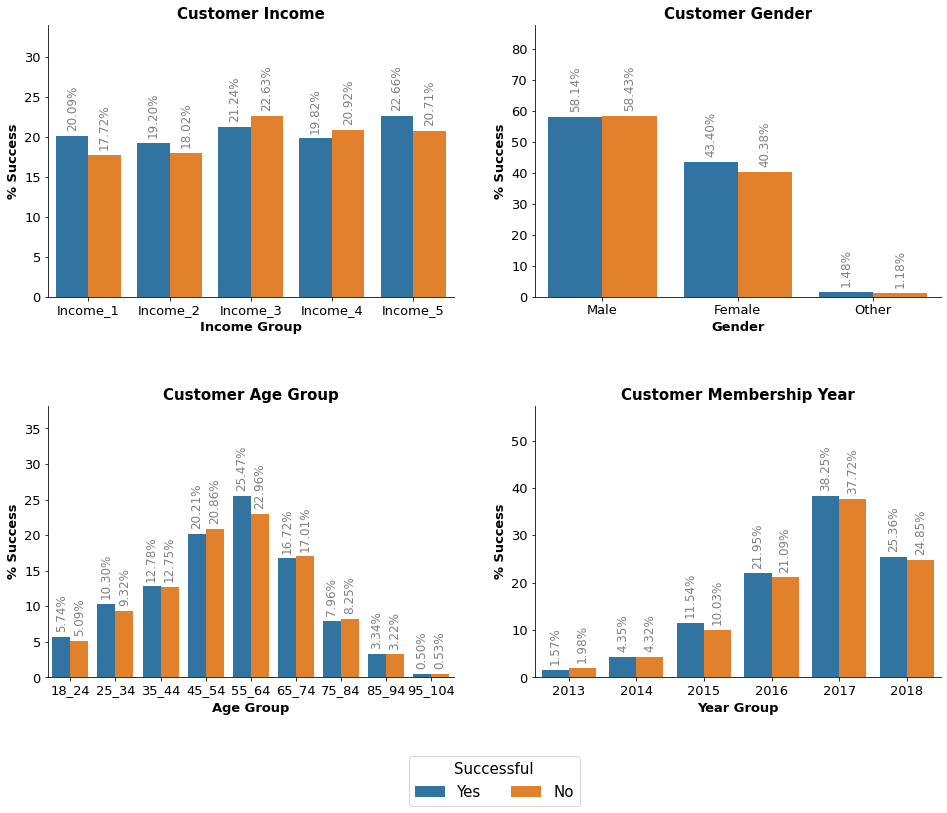

In [156]:
offer_analysis(1)

#### Offer 2 Analysis

In [157]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 2]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
1,2,10,5,10,1,0,0,1,1,1,1


Offer 2 

- Offer Successful
  Average customer income: $65,111.46 
  Average customer age: 53.8 years


- Offer Unsuccessful
  Average customer income: $65,446.79 
  Average customer age: 54.43 years



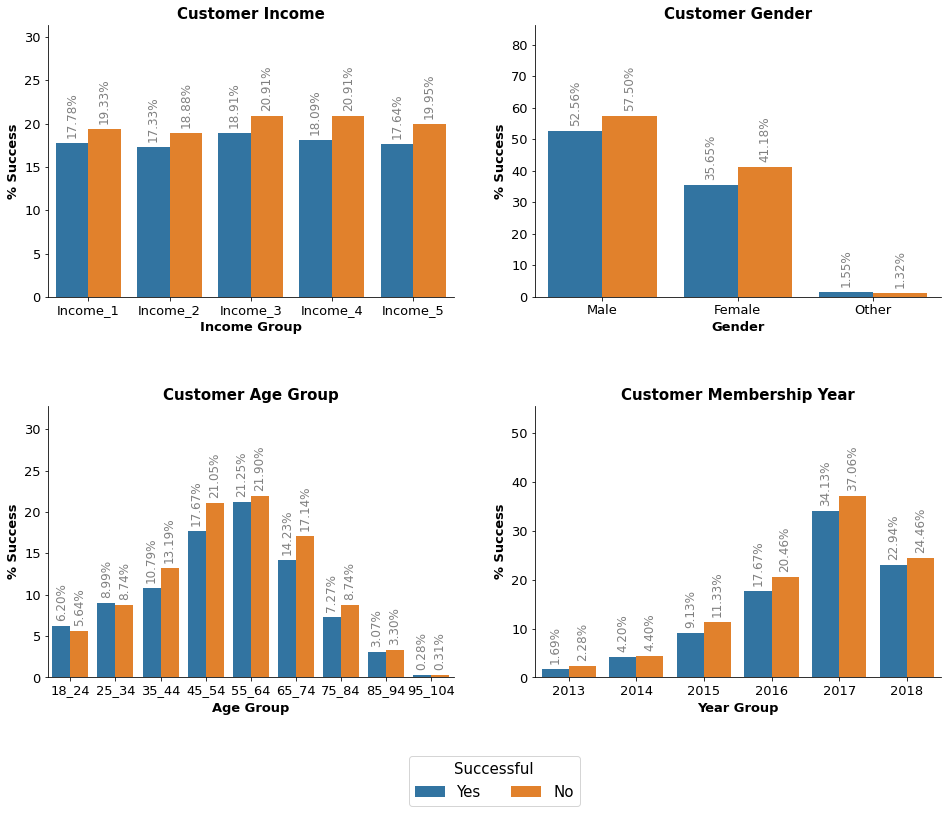

In [158]:
offer_analysis(2)

#### Offer 3 Analysis

In [159]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 3]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
2,3,0,4,0,0,0,1,1,1,0,1


Offer 3 

- Offer Successful
  Average customer income: $66,520.61 
  Average customer age: 53.58 years


- Offer Unsuccessful
  Average customer income: $65,420.53 
  Average customer age: 54.4 years



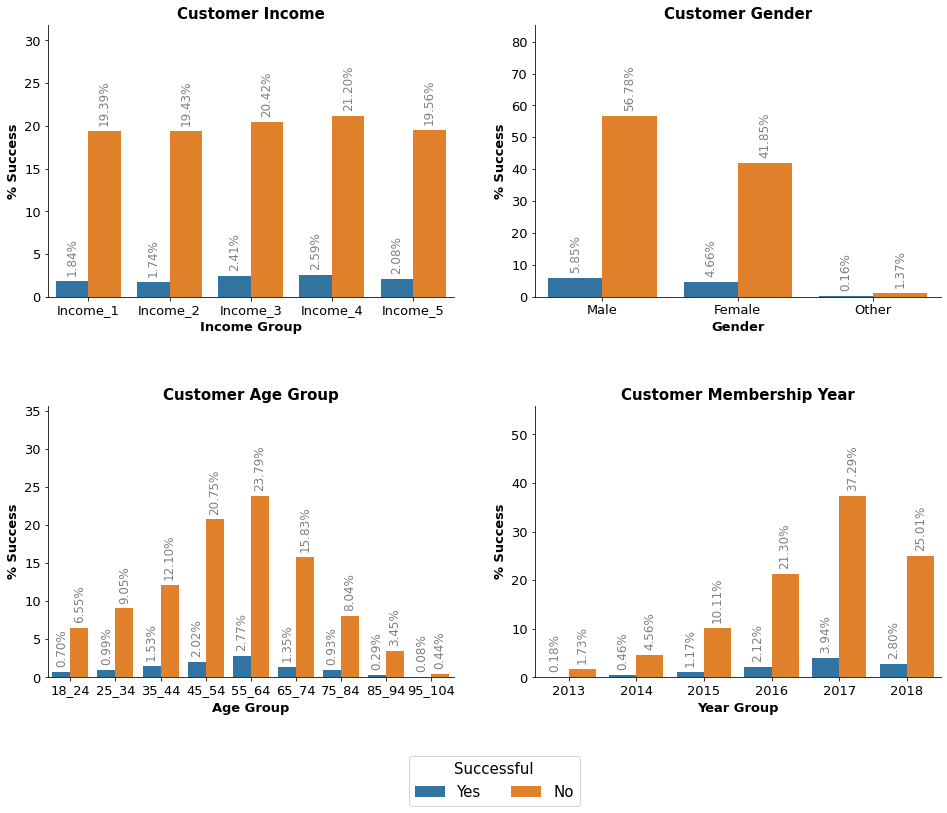

In [160]:
offer_analysis(3)

#### Offer 4 Analysis

In [161]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 4]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
3,4,5,7,5,1,0,0,1,1,0,1


Offer 4 

- Offer Successful
  Average customer income: $64,792.00 
  Average customer age: 54.3 years


- Offer Unsuccessful
  Average customer income: $65,462.88 
  Average customer age: 54.4 years



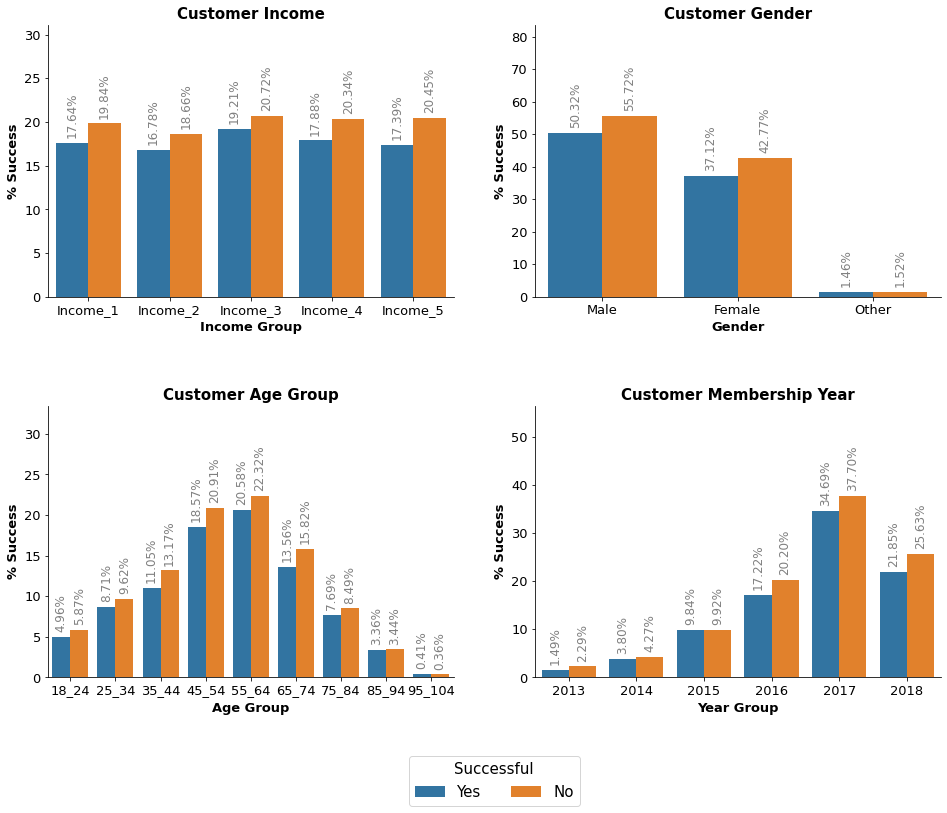

In [162]:
offer_analysis(4)

#### Offer 5 Analysis

In [163]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 5]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
4,5,20,10,5,0,1,0,1,0,0,1


Offer 5 

- Offer Successful
  Average customer income: $65,779.17 
  Average customer age: 54.91 years


- Offer Unsuccessful
  Average customer income: $65,415.31 
  Average customer age: 54.37 years



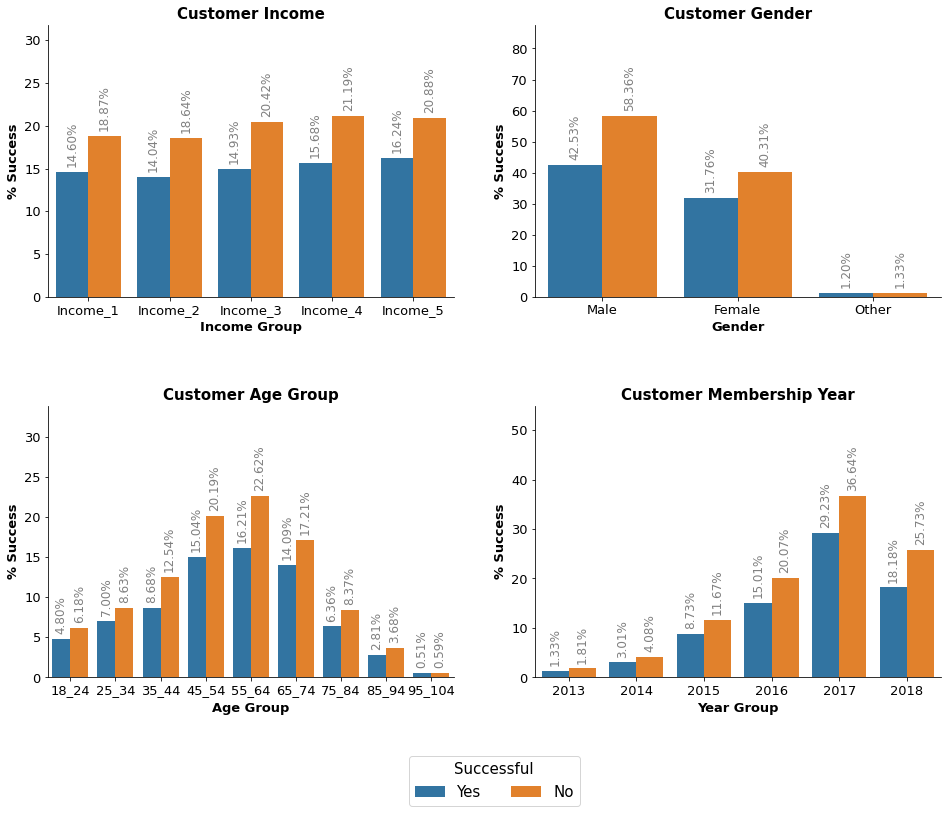

In [164]:
offer_analysis(5)

#### Offer 4 Analysis

In [165]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 6]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
5,6,7,7,3,0,1,0,1,1,1,1


Offer 6 

- Offer Successful
  Average customer income: $65,169.09 
  Average customer age: 54.64 years


- Offer Unsuccessful
  Average customer income: $65,450.09 
  Average customer age: 54.38 years



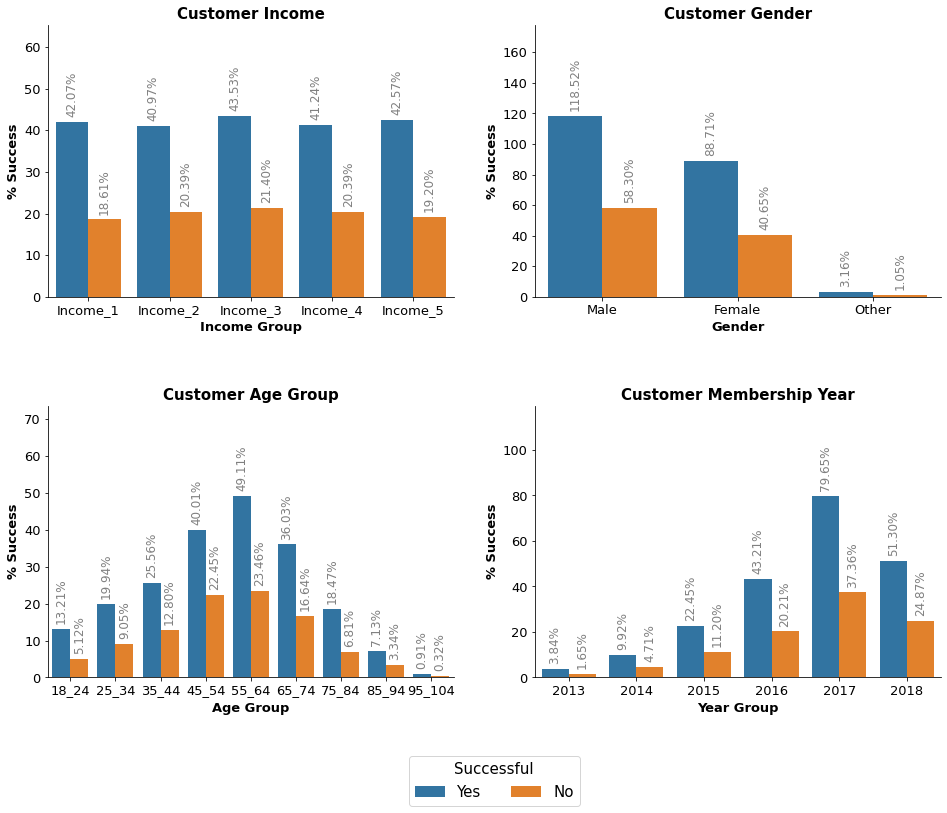

In [166]:
offer_analysis(6)

#### Offer 7 Analysis

In [167]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 7]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
6,7,10,10,2,0,1,0,1,1,1,1


Offer 7 

- Offer Successful
  Average customer income: $65,440.71 
  Average customer age: 54.11 years


- Offer Unsuccessful
  Average customer income: $65,430.38 
  Average customer age: 54.42 years



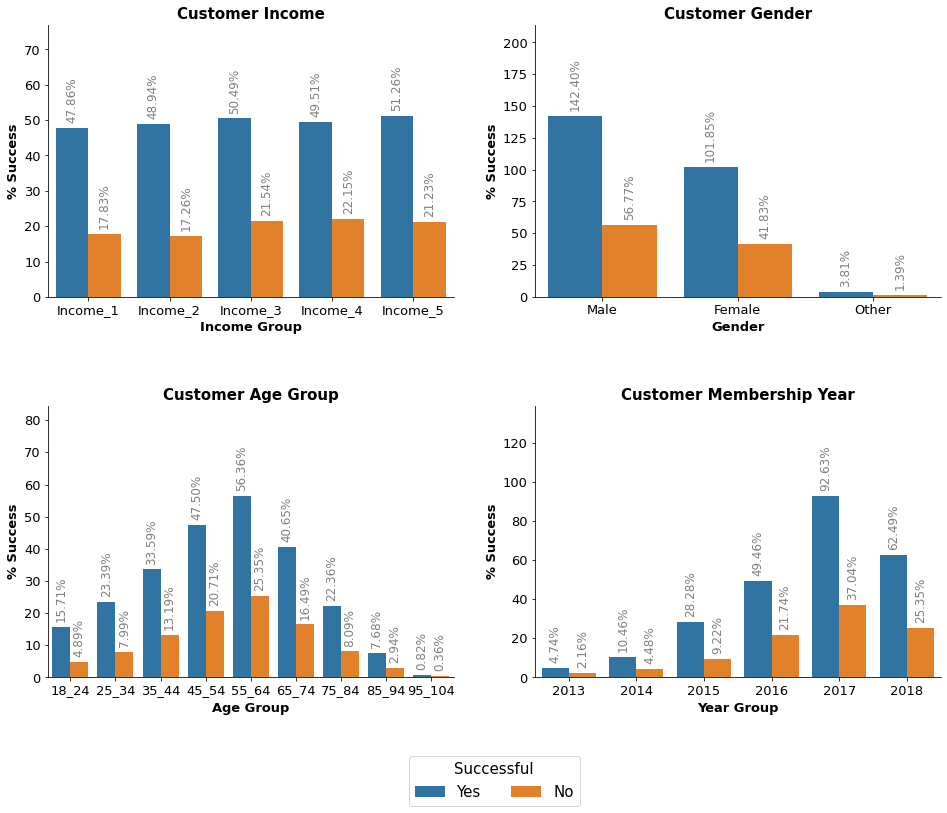

In [168]:
offer_analysis(7)

#### Offer 8 Analysis

In [169]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 8]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
7,8,0,3,0,0,0,1,1,1,1,0


Offer 8 

- Offer Successful
  Average customer income: $67,652.91 
  Average customer age: 54.76 years


- Offer Unsuccessful
  Average customer income: $65,413.59 
  Average customer age: 54.39 years



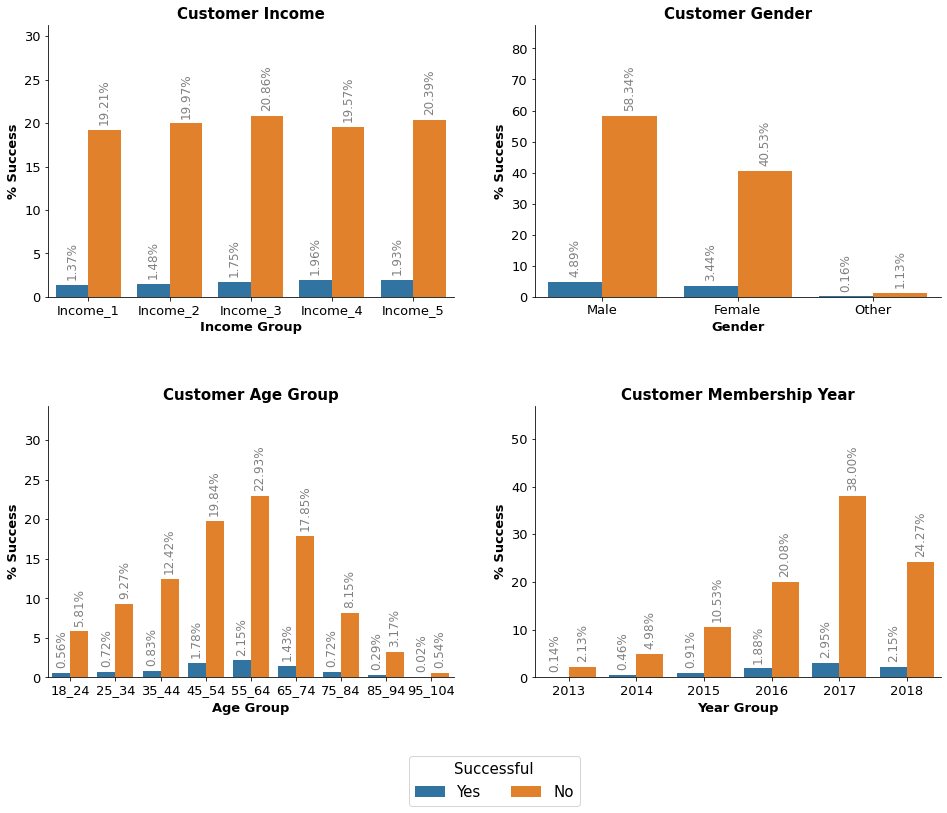

In [170]:
offer_analysis(8)

#### Offer 9 Analysis

In [171]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 9]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
8,9,5,5,5,1,0,0,1,1,1,1


Offer 9 

- Offer Successful
  Average customer income: $65,428.98 
  Average customer age: 54.1 years


- Offer Unsuccessful
  Average customer income: $65,431.24 
  Average customer age: 54.41 years



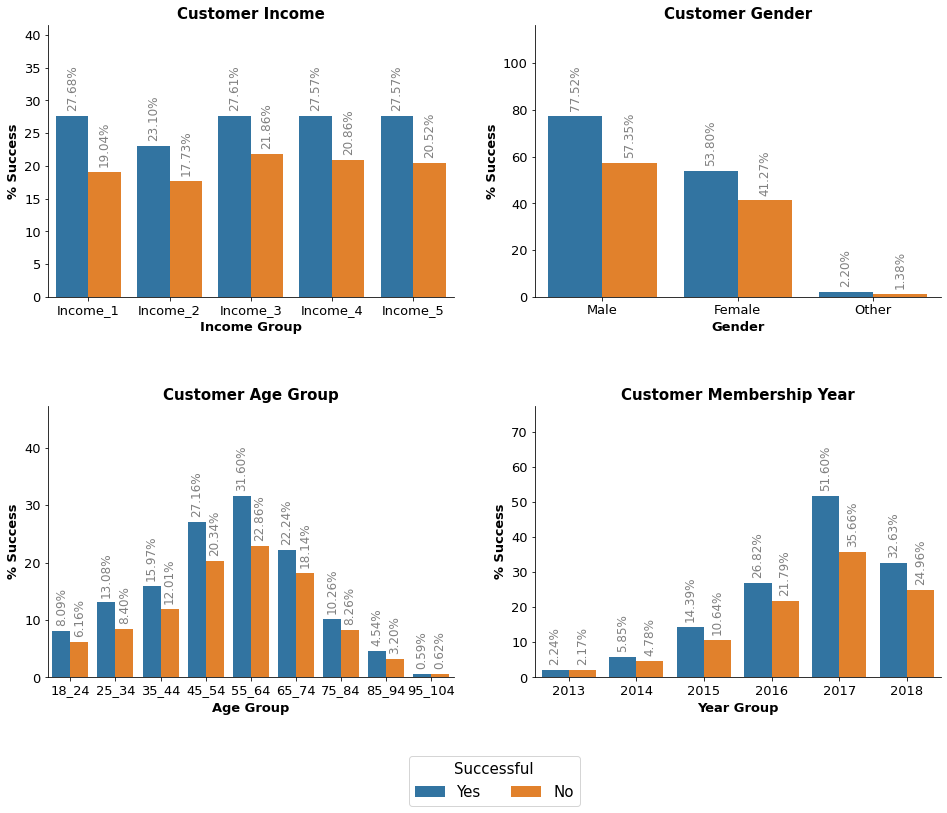

In [172]:
offer_analysis(9)

#### Offer 10 Analysis

In [173]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 10]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
9,10,10,7,2,0,1,0,1,1,0,1


Offer 10 

- Offer Successful
  Average customer income: $65,535.19 
  Average customer age: 54.45 years


- Offer Unsuccessful
  Average customer income: $65,426.10 
  Average customer age: 54.39 years



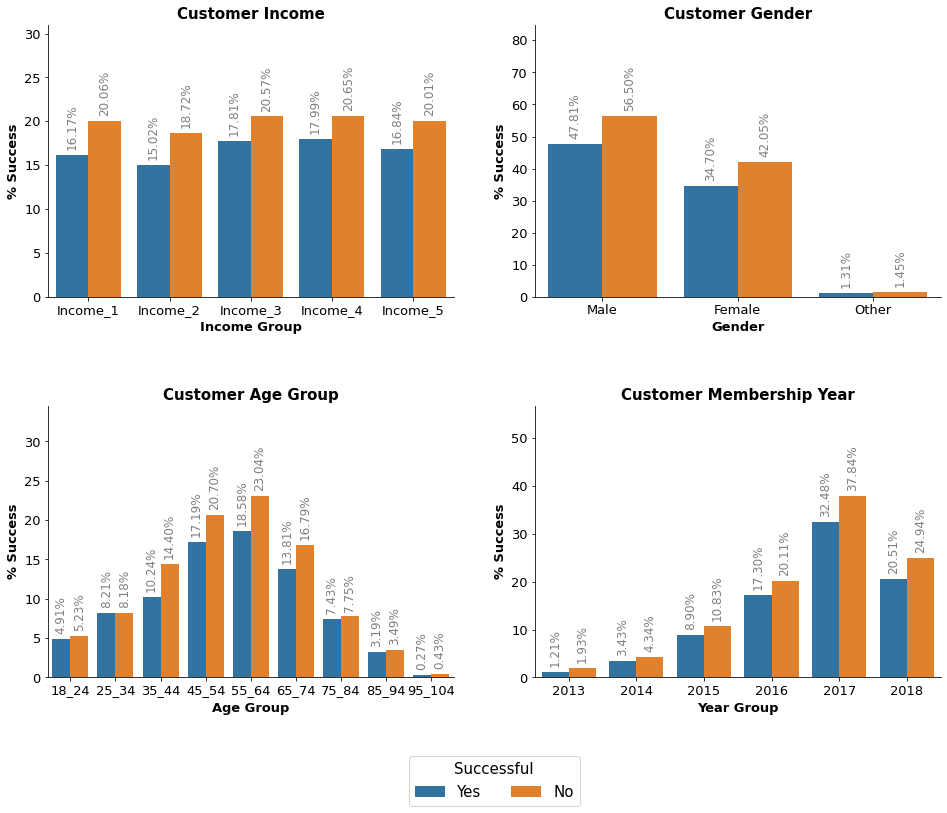

In [174]:
offer_analysis(10)

In [175]:
training_data_verbose.head()

,offer_id,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful,user_id,time,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,member_days,age
0,1.0,1.0,0.0,0.0,72000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,10796,24,64.39,10,7,10,1,0,0,1,1,1,0,1360,70
1,9.0,0.0,1.0,0.0,84000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2264,0,1.78,5,5,5,1,0,0,1,1,1,1,2282,44
2,5.0,0.0,1.0,0.0,34000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,11867,17,70.03,20,10,5,0,1,0,1,0,0,1,1618,42
3,5.0,0.0,1.0,0.0,34000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,12743,14,37.37,20,10,5,0,1,0,1,0,0,1,1525,36
4,5.0,0.0,1.0,0.0,34000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,11867,17,70.03,20,10,5,0,1,0,1,0,0,1,1618,42


**Reference:** Dummies to categories - https://stackoverflow.com/questions/26762100/reconstruct-a-categorical-variable-from-dummies-in-pandas

In [176]:
success_trans = success_df.transpose().reset_index()

In [177]:
success_trans

,index,0,1,2,3,4,5,6,7,8,9
0,offer_id,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
1,count,6862.000000,6733.000000,6796.000000,6855.000000,6874.000000,6788.000000,6756.000000,6812.000000,6784.000000,6855.000000
2,offer_successful,3482.000000,3185.000000,655.000000,3226.000000,2957.000000,4601.000000,4815.000000,533.000000,3879.000000,3126.000000
3,male,1965.000000,1865.000000,359.000000,1826.000000,1666.000000,2592.000000,2764.000000,307.000000,2252.000000,1783.000000
4,female,1467.000000,1265.000000,286.000000,1347.000000,1244.000000,1940.000000,1977.000000,216.000000,1563.000000,1294.000000
5,other,50.000000,55.000000,10.000000,53.000000,47.000000,69.000000,74.000000,10.000000,64.000000,49.000000
6,male_u,1975.000000,2040.000000,3487.000000,2022.000000,2286.000000,1275.000000,1102.000000,3663.000000,1666.000000,2107.000000
7,female_u,1365.000000,1461.000000,2570.000000,1552.000000,1579.000000,889.000000,812.000000,2545.000000,1199.000000,1568.000000
8,other_u,40.000000,47.000000,84.000000,55.000000,52.000000,23.000000,27.000000,71.000000,40.000000,54.000000
9,male_%,56.433084,58.555730,54.809160,56.602604,56.340886,56.335579,57.403946,57.598499,58.056200,57.037748


In [178]:
a = success_trans.loc[success_trans['index'] == 'male_%']
b = success_trans.loc[success_trans['index'] == 'female_%']
c = success_trans.loc[success_trans['index'] == 'other_%']
d = pd.concat([a, b])
e = pd.concat([d, c])

e = e.replace('male_%', 'Male')
e = e.replace('female_%', 'Female')
e = e.replace('other_%', 'Other')

In [179]:
f = success_trans.loc[success_trans['index'] == 'male_u%']
g = success_trans.loc[success_trans['index'] == 'female_u%']
h = success_trans.loc[success_trans['index'] == 'other_u%']
i = pd.concat([f, g])
j = pd.concat([i, h])

j = j.replace('male_u%', 'Male')
j = j.replace('female_u%', 'Female')
j = j.replace('other_u%', 'Other')

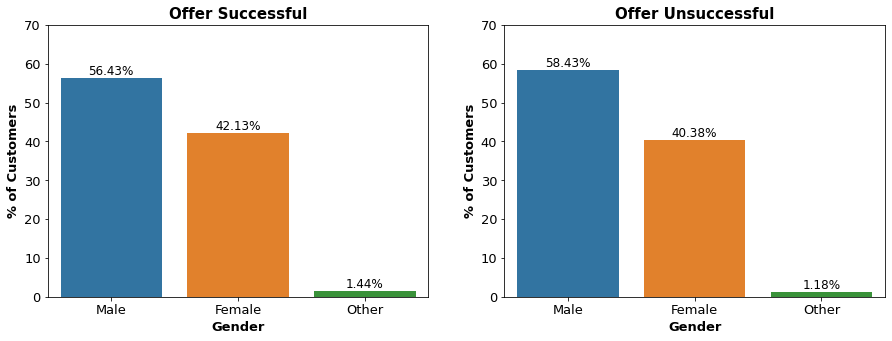

In [180]:
# Offer pct_success plot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Plot
ax1 = sns.barplot(ax=axes[0], x='index', y=0, data=e.iloc[:, 0:2])
ax2 = sns.barplot(ax=axes[1], x='index', y=0, data=j.iloc[:, 0:2])

# Styling
ax1.set(ylim=(0, 70)); ax2.set(ylim=(0, 70))
ax1.bar_label(ax1.containers[0], fmt='%.2f%%', size=12)
ax2.bar_label(ax2.containers[0], fmt='%.2f%%', size=12)
style_sns_2('Offer Successful', 'Offer Unsuccessful', 
            'Gender', '% of Customers', 'Gender', '% of Customers')

In [181]:
# Percent of users who joined in 2013
(training_data['2013'].sum() / training_data.shape[0]) * 100

1.8082164966111234

In [182]:
print_offer_probability(training_data[training_data.loc[:, 'offer_id'] == 1].copy(deep=True))

Probability of male offer_successful 49.39 %
Probability of male offer_unsuccessful 50.61 %
Probability of female offer_successful 52.33 %
Probability of female offer_unsuccessful 47.67 %
Probability of other offer_successful 49.02 %
Probability of other offer_unsuccessful 50.98 %
Probability of 2013 offer_successful 42.86 %
Probability of 2013 offer_unsuccessful 57.14 %
Probability of 2014 offer_successful 48.3 %
Probability of 2014 offer_unsuccessful 51.7 %
Probability of 2015 offer_successful 53.67 %
Probability of 2015 offer_unsuccessful 46.33 %
Probability of 2016 offer_successful 49.24 %
Probability of 2016 offer_unsuccessful 50.76 %
Probability of 2017 offer_successful 51.04 %
Probability of 2017 offer_unsuccessful 48.96 %
Probability of 2018 offer_successful 50.64 %
Probability of 2018 offer_unsuccessful 49.36 %


In [183]:
offer_percentage(training_data[training_data.loc[:, 'offer_id'] == 1].copy(deep=True), 'male')

Offer successful percentage for male 49.39 %
Offer unsuccessful percentage for male 50.61 %


In [184]:
# Average customer income and age when offer successful
print('Offer Successful')
offer_demographics(training_data_verbose, 1, 1)

# Average customer income and age when offer unsuccessful
print('\nOffer Unsuccessful')
offer_demographics(training_data_verbose, 1, 0)

Offer Successful
income    65427.837259
age          53.919058
dtype: float64

Offer Unsuccessful
income    65385.260371
age          54.359665
dtype: float64


<a id='4.3'></a>
### 4.3. Building models

#### Finding the best model

To find the best model I've prepared a function below which takes a selection of models that might work well with the dataset. The function will test each of the models and return the accuracy, precision, recall, f1-score and support per model. We are going to test fit 5 different models on our dataset. The models chosen are:

1. Logistic Regression: basic linear classifier (a good baseline model)
2. Random Forest: ensemble bagging classifier
3. K-Nearest Neighbors: instance based classifier
4. Gaussian Naive Bayes: probabilistic classifier
5. XGBoost: ensemble (extreme!) boosting classifier

I have omitted SVM because it had one of the worst performing models and was slow to train/score. For the initial experiements, I used the default parameters for each model. To get better results for the fit of each model, we'll need to fine tune the parameters later. 

**Choosing the Right Algorithm:** 
1. https://www.dummies.com/programming/big-data/data-science/choosing-right-algorithm-machine-learning/
2. https://medium.com/quick-code/regression-versus-classification-machine-learning-whats-the-difference-345c56dd15f7

In [185]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = [] 
    
    # Contains tuple of name and classifier or 'clf'
    models = [
              ('LogReg', LogisticRegression(max_iter=500)), # Stop iteration error
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              # Takes time to fit with similar perf to LogReg ('SVM', SVC()), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier(use_label_encoder=False, # Fix depreciation
                                    eval_metric='mlogloss')) 
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
    
    for name, model in models:
            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=random_state)
            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            print(name)
            print(classification_report(y_test, y_pred, target_names=target_names))
            results.append(cv_results)
            names.append(name)
            this_df = pd.DataFrame(cv_results)
            this_df['model'] = name
            dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [186]:
final = run_exps(X_train, y_train, X_test, y_test)
final

LogReg
              precision    recall  f1-score   support

   malignant       0.66      0.74      0.70     15069
      benign       0.62      0.53      0.57     12177

    accuracy                           0.65     27246
   macro avg       0.64      0.63      0.63     27246
weighted avg       0.64      0.65      0.64     27246

RF
              precision    recall  f1-score   support

   malignant       0.66      0.67      0.66     15069
      benign       0.58      0.58      0.58     12177

    accuracy                           0.63     27246
   macro avg       0.62      0.62      0.62     27246
weighted avg       0.63      0.63      0.63     27246

KNN
              precision    recall  f1-score   support

   malignant       0.66      0.67      0.67     15069
      benign       0.59      0.58      0.58     12177

    accuracy                           0.63     27246
   macro avg       0.63      0.63      0.63     27246
weighted avg       0.63      0.63      0.63     27246

GNB
 

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.261218,0.009920,0.645706,0.642973,0.645706,0.640905,0.715700,LogReg
1,0.282536,0.009945,0.638243,0.635615,0.638243,0.632994,0.704024,LogReg
2,0.238232,0.009919,0.631759,0.628562,0.631759,0.627842,0.705379,LogReg
3,0.251144,0.009949,0.653046,0.650950,0.653046,0.648593,0.721032,LogReg
4,0.282441,0.010912,0.644561,0.642312,0.644561,0.641589,0.716292,LogReg
5,2.161540,0.296608,0.613408,0.612842,0.613408,0.613096,0.667373,RF
6,2.171984,0.327856,0.621483,0.622277,0.621483,0.621823,0.676249,RF
7,2.144232,0.286168,0.612063,0.611413,0.612063,0.611702,0.664815,RF
8,2.114007,0.296121,0.623685,0.622998,0.623685,0.623288,0.680489,RF
9,2.093079,0.286724,0.615563,0.615068,0.615563,0.615289,0.671352,RF


To complete our analysis, we need to analyze the data in the `final` dataframe returned from the run_exps() script.
To obtain better estimates of the distribution of metrics from each model, we need to run empirical bootstrapping at 30 samples using the code below. Additionally, we should partition the data into two groups: 
- performance metrics
- fit-time metrics. 

#### Evaluating the results

In [187]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

# Performance Metrics
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

# Time Metrics
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

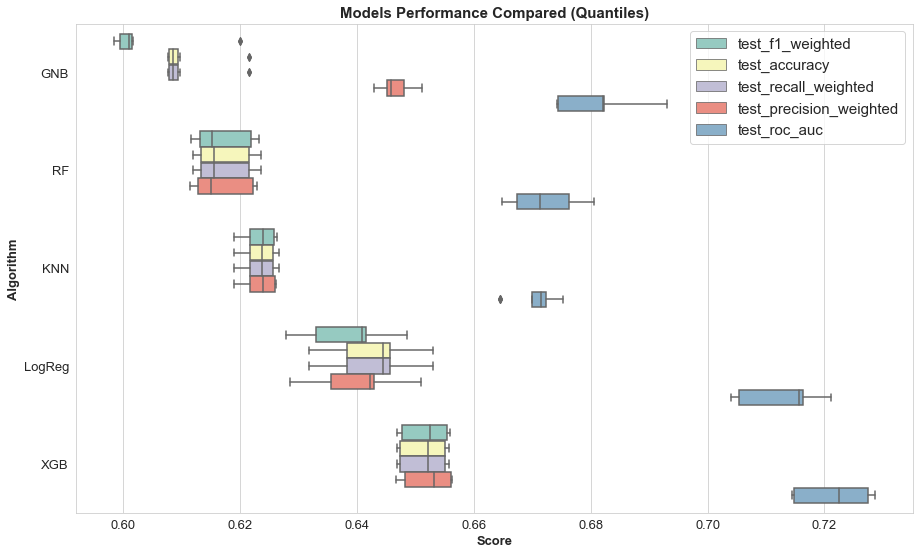

<Figure size 432x288 with 0 Axes>

In [284]:
# Plot
plt.figure(figsize=(15, 9))
ax = sns.boxplot(x="values", y="model", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(None), loc=1, borderaxespad=.5, fontsize=15)
plt.title('Comparison of Model by Classification Metric')

# Style chart
sns.set_style("whitegrid")
style_sns_1('Models Performance Compared (Quantiles)', 'Score', 'Algorithm')
plt.savefig('./benchmark_models_performance.png',dpi=300)
plt.show()

In [285]:
# Mean score of each model
max_scores = results_long_nofit.groupby('model').max().reset_index()
max_scores['metrics'] = 'test_overall_score'
max_scores = max_scores[['model', 'metrics', 'values']]
max_scores

,model,metrics,values
0,GNB,test_overall_score,0.693002
1,KNN,test_overall_score,0.675188
2,LogReg,test_overall_score,0.721032
3,RF,test_overall_score,0.680489
4,XGB,test_overall_score,0.728634


In [286]:
# Merge to create overall score bar for plot
ovr_scores = pd.concat([results_long_nofit, max_scores])

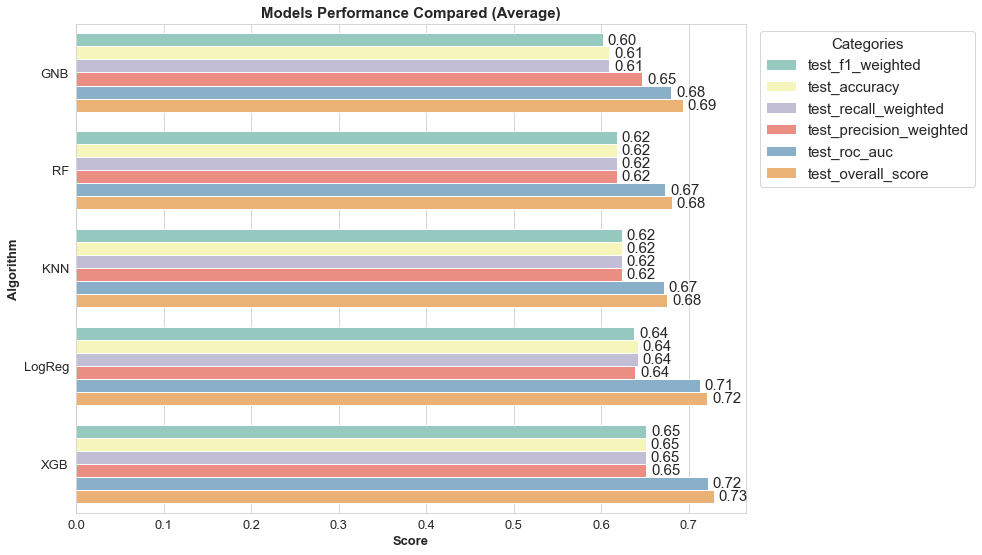

In [287]:
# Plot with error bar
plt.figure(figsize=(12, 9))
ax = sns.barplot(x='values', y='model', hue='metrics', 
                 data=ovr_scores, palette="Set3", errwidth=1,
                 ci=None)

for container in ax.containers:
    ax.bar_label(container, padding=5, fmt='%.2f') # Round values
    
# Style chart
ax.legend(title='Categories', bbox_to_anchor=(1.01, 1),
         fontsize='medium')
style_sns_1('Models Performance Compared (Average)', 'Score', 'Algorithm')

**Reference:** https://matplotlib.org/1.3.1/users/legend_guide.html

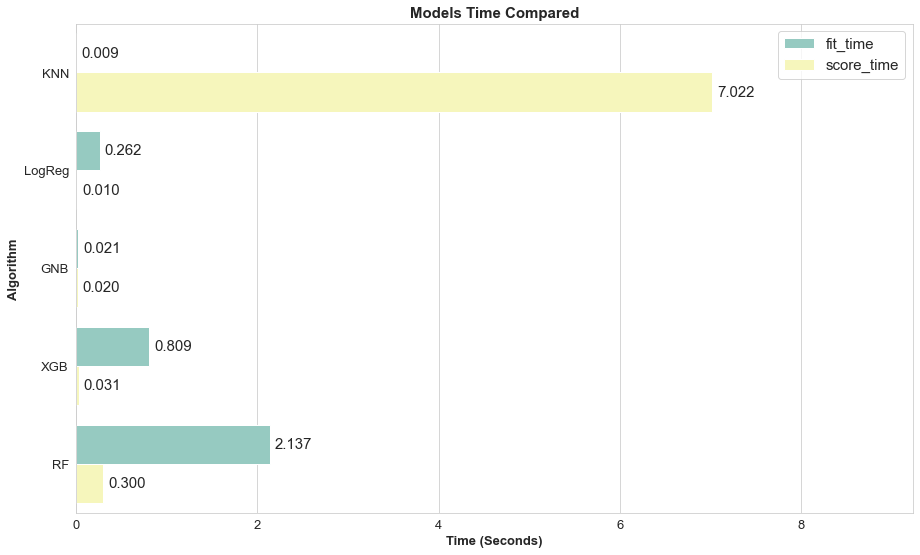

<Figure size 432x288 with 0 Axes>

In [192]:
# Plot
plt.figure(figsize=(15, 9))
ax = sns.barplot(x="values", y="model", hue="metrics", 
                 data=results_long_fit, palette="Set3",
                 ci=None) # Turn off error bars

# Display values
for container in ax.containers:
    ax.bar_label(container, padding=5, fmt='%.3f') # Round values

# Set tick limits
plt.xlim(0, results_long_fit['values'].max()+2)

# Style chart
sns.set_style("whitegrid")
plt.legend(bbox_to_anchor=(None), loc=1, borderaxespad=.5, fontsize=15)
plt.title('Comparison of Model by Fit and Score Time')
style_sns_1('Models Time Compared', 'Time (Seconds)', 'Algorithm')
plt.savefig('./benchmark_models_time.png',dpi=300)
plt.show()

**Observation:** From this plot we can see the best performing model appears to be **XGBoost**, followed by **Logistic Regression** and **Random Forest**. The differences are very small though. **KNN** was the fastest model to fit but also the took the longest to score by a large margin, the score times of the other models are extremely short. There seems to be a correlation between the length of time taken to fit the model and model performance as slower fitting models seem to perform better. The exception is **Random Forest** which takes the longest to fit but still ends up as the third-best performing model. From our findings, I would suggest continuing to refine the **XGBoost** model since it trains and performs the best of all the models.

Next, we can do further analysis on the models by finding the means and stds for each metric.

**Reference:**
1. https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
2. https://stackoverflow.com/questions/40088585/turn-off-error-bars-in-seaborn-bar-plot

In [193]:
# Create df to compare models
metrics = list(set(results_long_nofit.metrics.values))
results = bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])
results

test_roc_auc           test_accuracy           test_f1_weighted  \
                std      mean           std      mean              std   
model                                                                    
GNB        0.005237  0.679767      0.003409  0.609370         0.005167   
KNN        0.002933  0.671356      0.002646  0.623622         0.002604   
LogReg     0.005660  0.712618      0.006479  0.641928         0.006440   
RF         0.005695  0.672959      0.004602  0.617942         0.004710   
XGB        0.006439  0.721618      0.003556  0.650914         0.003702   

                 test_recall_weighted           test_precision_weighted  \
            mean                  std      mean                     std   
model                                                                     
GNB     0.601589             0.003409  0.609370                0.002518   
KNN     0.623649             0.002646  0.623622                0.002585   
LogReg  0.637738             0.006479  0.641928                0.006775   
RF      0.617763             0.004602  0.617942                0.004858   
XGB     0.651189             0.003556  0.650914                0.003939   

                  
            mean  
model             
GNB     0.646901  
KNN     0.623696  
LogReg  0.639252  
RF      0.617668  
XGB     0.651639

In [194]:
# Labels
time_metrics = list(set(results_long_fit.metrics.values))

# Group results
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time            fit_time          
              std      mean       std      mean
model                                          
GNB      0.004929  0.020461  0.002943  0.021467
KNN      0.164143  7.021644  0.002937  0.008539
LogReg   0.000424  0.010156  0.017004  0.262267
RF       0.016000  0.300417  0.030886  2.136886
XGB      0.000747  0.031215  0.020894  0.809092

**Reference:** Quickly test multiple models - https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

# Fine tune XGBOOST and save final model as pkl

In [195]:
def evaluate_model_performance(clf,
                               X_train,
                               y_train):
    """ Prints a model's accuracy and F1-score
    
    INPUT:
        clf: Model object (or Classifier)
        
        X_train: Training data matrix

        y_train: Expected model output vector
    
    OUTPUT:
        clf_accuracy: Model accuracy
        
        clf_f1_score: Model F1-score"""
    class_name = re.sub("[<>']", '', str(clf.__class__))
    class_name = class_name.split(' ')[1]
    class_name = class_name.split('.')[-1]

    y_pred_rf = clf.predict(X_train)

    clf_accuracy = accuracy_score(y_train, y_pred_rf)
    clf_f1_score = f1_score(y_train, y_pred_rf)
    
    print("%s Model Accuracy: %.3f" % (class_name, clf_accuracy))
    print("%s Model F1-Score: %.3f" % (class_name, clf_f1_score))
    
    return clf_accuracy, clf_f1_score

In [196]:
model_dir = "./models"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
lr_model_path = os.path.join(model_dir, 'lr_clf.joblib')

scorer = make_scorer(fbeta_score,
                     beta=0.5)

if os.path.exists(lr_model_path):
    lr_random = load(lr_model_path)
else:
    lr_clf = LogisticRegression(random_state=random_state,
                                solver='liblinear')

    random_grid = {'penalty': ['l1', 'l2'],
                   'C': [1.0, 0.1, 0.01]}

    lr_random = RandomizedSearchCV(estimator = lr_clf,
                                   param_distributions = random_grid,
                                   scoring=scorer,
                                   n_iter = 6,
                                   cv = 3,
                                   verbose=2,
                                   random_state=random_state,
                                   n_jobs = 3)

    lr_random.fit(X_train, y_train)

    dump(lr_random, lr_model_path)
    
evaluate_model_performance(lr_random.best_estimator_,
                           X_train,
                           y_train)

LogisticRegression Model Accuracy: 0.646
LogisticRegression Model F1-Score: 0.565


(0.6463823435856028, 0.5645151569939132)

#### Decision Tree Classifier

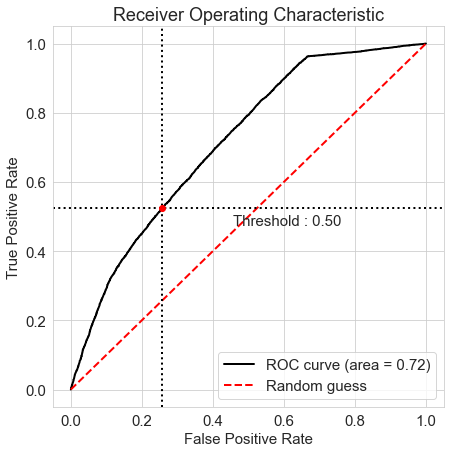

In [197]:
# Fit model
clf = LogisticRegression(max_iter=500)
clf = clf.fit(X_train, y_train)

# Use predict_proba to predict probability of the class
y_pred = clf.predict_proba(X_test)[:,1]

# We can now use plot_metric to plot ROC Curve
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
bc.plot_roc_curve()
plt.show()

**Reference:** https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

#### Predictive Modelling

In [198]:
naive_predictor_accuracy = accuracy_score(y_train,np.ones(len(y_train)))
naive_predictor_f1score = f1_score(y_train, np.ones(len(y_train)))
np_random = naive_predictor_accuracy, naive_predictor_f1score

# Print results
print('Naive Predictor Accuracy:', round(naive_predictor_accuracy, 3))
print('Naive Predictor F1-Score:', round(naive_predictor_f1score, 3))

Naive Predictor Accuracy: 0.447
Naive Predictor F1-Score: 0.618


#### Gaussian Naive Bayes

In [199]:
model_dir = "./models"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
gnb_model_path = os.path.join(model_dir, 'gnb_clf.joblib')

scorer = make_scorer(fbeta_score,
                     beta=0.5)

if os.path.exists(gnb_model_path):
    gnb_random = load(gnb_model_path)
else:
    gnb_clf = GaussianNB()

    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

    gnb_random = RandomizedSearchCV(estimator = gnb_clf,
                                   param_distributions=params_NB,
                                   scoring=scorer,
                                   n_iter = 6,
                                   cv = 3, # use cross validation technique 3 
                                   verbose=2,
                                   random_state=random_state,
                                   n_jobs = 3)

    gnb_random.fit(X_train, y_train)

    dump(gnb_random, gnb_model_path)

In [200]:
# Setting that gave the best results
gnb_random.best_params_

{'var_smoothing': 2.848035868435799e-08}

In [201]:
evaluate_model_performance(gnb_random.best_estimator_,
                           X_train,
                           y_train)

GaussianNB Model Accuracy: 0.611
GaussianNB Model F1-Score: 0.645


(0.6114903716753529, 0.64540622627183)

**Reference:** https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb

#### Logistic Regression

In [202]:
model_dir = "./models"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
lr_model_path = os.path.join(model_dir, 'lr_clf.joblib')

scorer = make_scorer(fbeta_score,
                     beta=0.5)

if os.path.exists(lr_model_path):
    lr_random = load(lr_model_path)
else:
    lr_clf = LogisticRegression(random_state=random_state,
                                solver='liblinear')

    random_grid = {'penalty': ['l1', 'l2'],
                   'C': [1.0, 0.1, 0.01]}

    lr_random = RandomizedSearchCV(estimator = lr_clf,
                                   param_distributions = random_grid,
                                   scoring=scorer,
                                   n_iter = 6,
                                   cv = 3,
                                   verbose=2,
                                   random_state=random_state,
                                   n_jobs = 3)

    lr_random.fit(X_train, y_train)

    dump(lr_random, lr_model_path)

In [203]:
evaluate_model_performance(lr_random.best_estimator_,
                           X_train,
                           y_train)

LogisticRegression Model Accuracy: 0.646
LogisticRegression Model F1-Score: 0.565


(0.6463823435856028, 0.5645151569939132)

#### Random Forest Classifier

In [204]:
rf_model_path = os.path.join(model_dir, 'rf_clf.joblib')

if os.path.exists(rf_model_path):
    rf_random = load(rf_model_path)
else:
    rf_clf = RandomForestClassifier(random_state=random_state)

    # Number of trees in random forest
    n_estimators = [10, 30, 50, 100, 150, 200, 250, 300]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.arange(3, 11)]
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}

    rf_random = RandomizedSearchCV(estimator = rf_clf,
                                   param_distributions = random_grid,
                                   scoring=scorer,
                                   n_iter = 100,
                                   cv = 3,
                                   verbose=2,
                                   random_state=random_state,
                                   n_jobs = 3)

    rf_random.fit(X_train, y_train)
    
    dump(rf_random, rf_model_path)

In [205]:
evaluate_model_performance(rf_random.best_estimator_,
                           X_train,
                           y_train)

RandomForestClassifier Model Accuracy: 0.676
RandomForestClassifier Model F1-Score: 0.621


(0.6761359465609631, 0.6206580304940961)

<a id='4.4'></a>
### 4.4. Assessing models

It's time to review the models that we have created, from a technical standpoint but also from a business standpoint.

In [206]:
# Model assessment by grouped by mean
mass = results_long_nofit.groupby(['model', 'metrics']).mean().reset_index()

**Reference:** https://realpython.com/pandas-groupby/

#### Model assessment

We need to summarize the information developed in our model review. Since we have created several models, we can rank them based on our assessment of their value for a specific application.

In [207]:
# Best test accuracy
mass[mass['metrics'] == 'test_accuracy'].sort_values(by='values', ascending=False).reset_index(drop=True)

,model,metrics,values
0,XGB,test_accuracy,0.650914
1,LogReg,test_accuracy,0.641928
2,KNN,test_accuracy,0.623622
3,RF,test_accuracy,0.617942
4,GNB,test_accuracy,0.609370


**Observation:** **XGBoost** has the best **accuracy** from our observations, closely followed by **LogReg** and **KNN**.

In [208]:
# Best test f1 score
mass[mass['metrics'] == 'test_f1_weighted'].sort_values(by='values', ascending=False).reset_index(drop=True)

,model,metrics,values
0,XGB,test_f1_weighted,0.651189
1,LogReg,test_f1_weighted,0.637738
2,KNN,test_f1_weighted,0.623649
3,RF,test_f1_weighted,0.617763
4,GNB,test_f1_weighted,0.601589


**Observation:** **XGBoost** has the best **f1-score** from our observations, closely followed by **LogReg** but **KNN** a bit further back than before.

In [209]:
# Best test precision weighted
mass[mass['metrics'] == 'test_precision_weighted'].sort_values(by='values', ascending=False).reset_index(drop=True)

,model,metrics,values
0,XGB,test_precision_weighted,0.651639
1,GNB,test_precision_weighted,0.646901
2,LogReg,test_precision_weighted,0.639252
3,KNN,test_precision_weighted,0.623696
4,RF,test_precision_weighted,0.617668


**Observation:** **XGBoost** has the best **precision weighted** score from our observations, closely followed by **GNB** and **LogReg**.

In [210]:
# Best test_recall_weighted
mass[mass['metrics'] == 'test_recall_weighted'].sort_values(by='values', ascending=False).reset_index(drop=True)

,model,metrics,values
0,XGB,test_recall_weighted,0.650914
1,LogReg,test_recall_weighted,0.641928
2,KNN,test_recall_weighted,0.623622
3,RF,test_recall_weighted,0.617942
4,GNB,test_recall_weighted,0.609370


**Observation:** **XGBoost** has the best **recall weighted** score from our observations, closely followed by **LogReg** and **KNN**.

In [211]:
# Best test_roc_auc
mass[mass['metrics'] == 'test_roc_auc'].sort_values(by='values', ascending=False).reset_index(drop=True)

,model,metrics,values
0,XGB,test_roc_auc,0.721618
1,LogReg,test_roc_auc,0.712618
2,GNB,test_roc_auc,0.679767
3,RF,test_roc_auc,0.672959
4,KNN,test_roc_auc,0.671356


**Observation:** **XGBoost** has the best **ROC AUC** score from our observations, closely followed by **LogReg** and **GNB**.

**Conclusion:** From our findings, I would suggest continuing to refine the **XGBoost** model since it trains and performs the best of all the models.

#### Revised parameter settings
Since we have found our best performing model, we can fine-tune settings that were used to build the model and conduct another round of modeling and try to improve our results.

In [212]:
model = XGBClassifier(use_label_encoder=False)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.64903	validation_0-error:0.35178	validation_1-logloss:0.64880	validation_1-error:0.35598
[1]	validation_0-logloss:0.62567	validation_0-error:0.35117	validation_1-logloss:0.62527	validation_1-error:0.35506
[2]	validation_0-logloss:0.61209	validation_0-error:0.34872	validation_1-logloss:0.61193	validation_1-error:0.35473
[3]	validation_0-logloss:0.60386	validation_0-error:0.34728	validation_1-logloss:0.60407	validation_1-error:0.35506
[4]	validation_0-logloss:0.59888	validation_0-error:0.34672	validation_1-logloss:0.59950	validation_1-error:0.35579
[5]	validation_0-logloss:0.59544	validation_0-error:0.34576	validation_1-logloss:0.59666	validation_1-error:0.35554
[6]	validation_0-logloss:0.59337	validation_0-error:0.34439	validation_1-logloss:0.59512	validation_1-error:0.35458
[7]	validation_0-logloss:0.59178	validation_0-error:0.34207	validation_1-logloss:0.59423	validation_1-error:0.35642
[8]	validation_0-logloss:0.59060	validation_0-error:0.34168	validation_1

[71]	validation_0-logloss:0.54839	validation_0-error:0.29105	validation_1-logloss:0.59162	validation_1-error:0.34574
[72]	validation_0-logloss:0.54810	validation_0-error:0.29066	validation_1-logloss:0.59163	validation_1-error:0.34548
[73]	validation_0-logloss:0.54768	validation_0-error:0.29034	validation_1-logloss:0.59157	validation_1-error:0.34556
[74]	validation_0-logloss:0.54734	validation_0-error:0.28978	validation_1-logloss:0.59161	validation_1-error:0.34479
[75]	validation_0-logloss:0.54700	validation_0-error:0.28983	validation_1-logloss:0.59166	validation_1-error:0.34523
[76]	validation_0-logloss:0.54639	validation_0-error:0.28882	validation_1-logloss:0.59164	validation_1-error:0.34515
[77]	validation_0-logloss:0.54597	validation_0-error:0.28858	validation_1-logloss:0.59170	validation_1-error:0.34534
[78]	validation_0-logloss:0.54553	validation_0-error:0.28807	validation_1-logloss:0.59168	validation_1-error:0.34614
[79]	validation_0-logloss:0.54509	validation_0-error:0.28794	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [213]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.48%


In [214]:
axes[0]

<AxesSubplot:title={'center':'Offer Successful'}, xlabel='Gender', ylabel='% of Customers'>

In [215]:
ax1

<AxesSubplot:title={'center':'Offer Successful'}, xlabel='Gender', ylabel='% of Customers'>

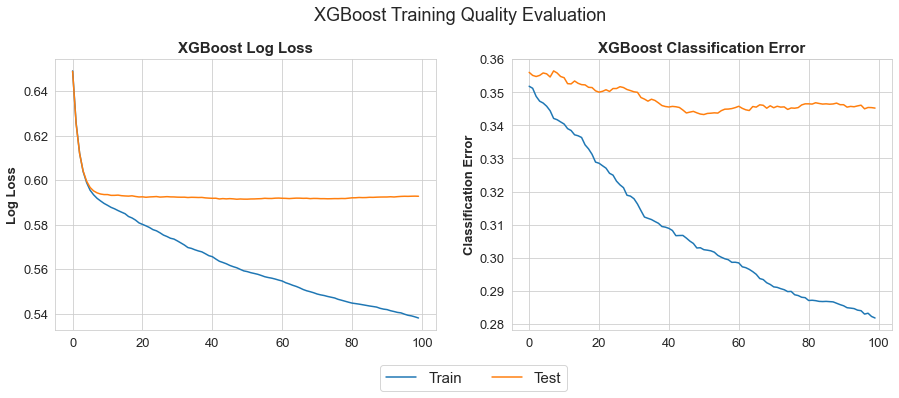

In [216]:
# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

f, axes = plt.subplots(1, 2, figsize=(15, 5))
f.suptitle('XGBoost Training Quality Evaluation\n\n', y=1.025)
ax1, ax2 = axes[0], axes[1]

# Plot log loss
ax1 = sns.lineplot(x=x_axis, y=results['validation_0']['logloss'], label='Train', ax=ax1)
ax1 = sns.lineplot(x=x_axis, y=results['validation_1']['logloss'], label='Test', ax=ax1)
ax1.legend().remove()

# Plot classification error
ax2 = sns.lineplot(x=x_axis, y=results['validation_0']['error'], label='Train', ax=ax2)
ax2 = sns.lineplot(x=x_axis, y=results['validation_1']['error'], label='Test', ax=ax2)
ax2.legend(bbox_to_anchor=(-0.1, -.25), loc=8, ncol=3)

style_sns_2('XGBoost Log Loss', 'XGBoost Classification Error', 
            '', 'Log Loss', '', 'Classification Error')

plt.show()

**Reference:** 
1. https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
2. https://newbedev.com/how-to-position-suptitle

In [ ]:
# Init lists
model_list = [lr_random, rf_random]
accuracy = [np_random[0]]
f1 = [np_random[1]]

for i in model_list:

            # Prediction
            clf = i
            y_pred_rf = clf.predict(X_train)
            clf_accuracy = accuracy_score(y_train, y_pred_rf)
            clf_f1_score = f1_score(y_train, y_pred_rf)

            # Append results
            accuracy.append(clf_accuracy)
            f1.append(clf_f1_score)
            
compare = pd.DataFrame(list(zip(accuracy, f1)),
             columns=['accuracy', 'f1-score'],
             index=['naive_predictor', 'logistic_regression', 'random_forest'])
compare = compare.reset_index().rename(columns={'index':'model'})

In [ ]:
compare

In [279]:
# Init lists
model_list = [lr_random, rf_random]
model_labels = ['naive_predictor', 
                'logistic_regression', 
                'random_forest']
metric_labels = ['accuracy', 'f1-score']
model = []
metric = ['accuracy', 'f1-score']

# Add naive model results
accuracy = [np_random[0], np_random[1]] 

# Iterrate through model_list
for i in model_list:
            # Prediction
            clf = i
            y_pred_rf = clf.predict(X_train)
            clf_accuracy = accuracy_score(y_train, y_pred_rf)
            clf_f1_score = f1_score(y_train, y_pred_rf)

            # Append results
            accuracy.append(clf_accuracy)
            accuracy.append(clf_f1_score)
            
            # Append metric labels
            metric.append(metric_labels[0])
            metric.append(metric_labels[1])
            
            # Append model labels
            model.append(model_labels[0]); model.append(model_labels[0])
            model.append(model_labels[1]); model.append(model_labels[1])
            model.append(model_labels[2]); model.append(model_labels[2])

# Save to DataFrame
compare1 = pd.DataFrame(list(zip(model, metric, accuracy)),
             columns=['model', 'metric', 'score'])

In [280]:
compare1

,model,metric,score
0,naive_predictor,accuracy,0.447332
1,naive_predictor,f1-score,0.618147
2,logistic_regression,accuracy,0.646382
3,logistic_regression,f1-score,0.564515
4,random_forest,accuracy,0.676136
5,random_forest,f1-score,0.620658


In [281]:
compare1.groupby(['model', 'metric']).mean()

score
model               metric            
logistic_regression accuracy  0.646382
                    f1-score  0.564515
naive_predictor     accuracy  0.447332
                    f1-score  0.618147
random_forest       accuracy  0.676136
                    f1-score  0.620658

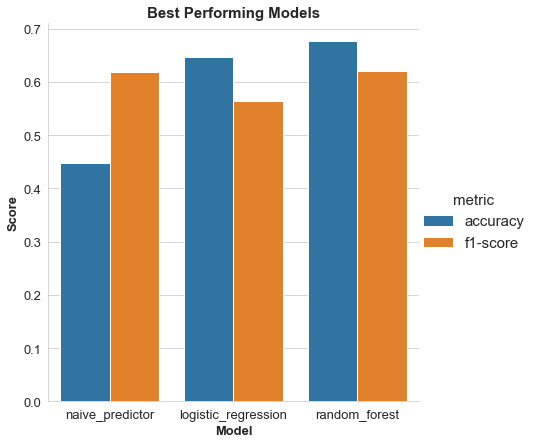

In [282]:
# Gender distribution
sns.catplot(x='model', y='score', hue='metric', kind='bar', data=compare1, height=6)

# Style plot
style_sns_1('Best Performing Models', 'Model', 'Score')

**Reference:** 
1. Plotting with categorical data - https://seaborn.pydata.org/tutorial/categorical.html
2. How to calculate feature importance - https://machinelearningmastery.com/calculate-feature-importance-with-python/

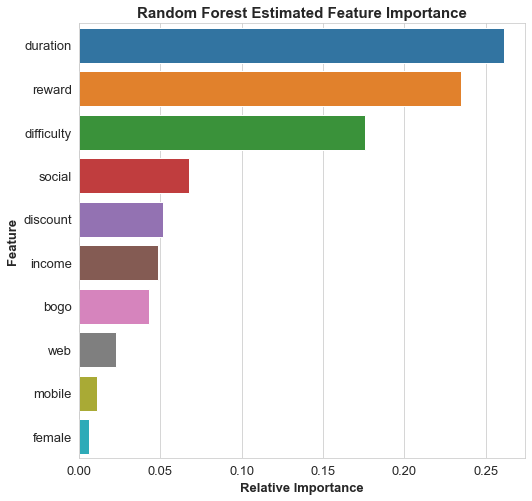

In [288]:
relative_importance = rf_random.best_estimator_.feature_importances_
relative_importance = relative_importance / np.sum(relative_importance)

feature_importance =\
    pd.DataFrame(list(zip(variable_names,
                          relative_importance)),
                 columns=['feature', 'relative_importance'])

feature_importance = feature_importance.sort_values('relative_importance',
                                                    ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

plt.figure(figsize=(8, 8))
sns.barplot(x='relative_importance',
            y='feature',
            data=feature_importance[:10])

# Style plot
style_sns_1('Random Forest Estimated Feature Importance', 'Relative Importance', 'Feature')
plt.show()

In [289]:
# Top ten most important features
feature_importance[:10]

,feature,relative_importance
0,duration,0.261087
1,reward,0.234720
2,difficulty,0.175562
3,social,0.067868
4,discount,0.051468
5,income,0.048613
6,bogo,0.043399
7,web,0.023108
8,mobile,0.011398
9,female,0.006006


<a id='5'></a>
## 5. Evaluation

We’ve explored the customer data and you’ve found patterns, and now we have to ask: Are the results any good? It's time to evaluate not just the models we have created, but also the process that we used to create them and their potential for practical use.

**Reference:** https://www.ritchieng.com/machine-learning-evaluate-classification-model/

<a id='5.1'></a>
### 5.1. Evaluating results

#### Classification accuracy (Percentage of correct predictions)

In [290]:
# Make class predictions for the testing set
y_pred_class = lr_random.predict(X_test)

# Calculate accuracy
from sklearn import metrics
print('Classification Accuracy:', round(metrics.accuracy_score(y_test, y_pred_class), 3), '%')

Classification Accuracy: 0.646 %


In [291]:
# examine the class distribution of the testing set (using a Pandas Series method)
np.where(y_test == 0) #.count()

(array([    1,     2,     3, ..., 27242, 27244, 27245], dtype=int64),)

In [292]:
# Mean of y_test
round(y_test.mean(), 3)

0.447

In [293]:
# y_test value counts
print('1:', y_test.shape[0] - np.count_nonzero(y_test),
      '\n0:', np.count_nonzero(y_test))

1: 15069 
0: 12177


In [294]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
lr_cm = metrics.confusion_matrix(y_test, y_pred_class)
print(lr_cm)

[[11379  3690]
 [ 5952  6225]]


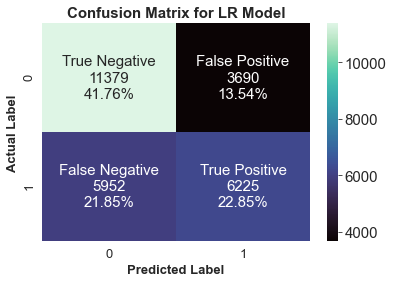

(0.6761359465609631, 0.6206580304940961)

In [295]:
# Confusion matrix function for lr_random model
y_pred_class = lr_random.predict(X_test)
lr_cm = metrics.confusion_matrix(y_test, y_pred_class)

# Plot
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['0', '1']
make_confusion_matrix(lr_cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='mako')

# Style
style_sns_1('Confusion Matrix for LR Model', 'Predicted Label', 'Actual Label')

# Scores
accuracy_score(y_train, y_pred_rf), f1_score(y_train, y_pred_rf)

In [296]:
# Make class predictions for the testing set
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class = gnb.predict(X_test)

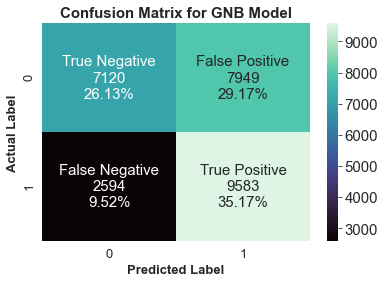

In [297]:
# Confusion matrix function for C model
y_pred_class = gnb_random.predict(X_test)
gnb_cm = metrics.confusion_matrix(y_test, y_pred_class)

# Plot
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['0', '1']
make_confusion_matrix(gnb_cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='mako')

# Style
style_sns_1('Confusion Matrix for GNB Model', 'Predicted Label', 'Actual Label')

# Scores


**References:**
1. https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
2. https://www.codegrepper.com/code-examples/python/sns+heatmap+annot+large+number+format
3. https://github.com/DTrimarchi10/confusion_matrix
4. https://stackoverflow.com/questions/44116194/import-a-function-from-another-ipynb-file
5. https://towardsdatascience.com/how-to-evaluate-your-machine-learning-models-with-python-code-5f8d2d8d945b

<a id='5.2'></a>
### 5.2. Reviewing the process

<a id='5.3'></a>
### 5.3. Determining the next steps

<a id='6'></a>
## 6. Deployment

<a id='6.1'></a>
### 6.1. Planning deployment

<a id='6.2'></a>
### 6.2. Reporting final results

<a id='6.3'></a>
### 6.3. Reviewing final results

<a id='7'></a>
## 7. Resources

#### General
https://towardsdatascience.com/crisp-dm-methodology-for-your-first-data-science-project-769f35e0346c <br>
https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8 <br>
https://www.snapsurveys.com/blog/5-survey-demographic-question-examples/ <br>
https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html <br>
https://www.geeksforgeeks.org/python-ways-to-convert-boolean-values-to-integer/ <br>
https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe <br>
https://stackoverflow.com/questions/39602824/pandas-replace-string-with-another-string <br>
https://medium.com/analytics-vidhya/mastering-pandas-indexing-loc-iloc-47ee22b009db <br>

#### Rename
https://www.quora.com/How-can-I-replace-characters-in-a-multiple-column-name-in-pandas <br>

#### Warnings
https://realpython.com/pandas-settingwithcopywarning/ <br>
https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/

#### EDA and Cleaning
https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/ <br>
https://www.pluralsight.com/guides/cleaning-up-data-from-outliers <br>
https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e <br>

#### Value Counts
https://www.kaggle.com/parulpandey/five-ways-to-use-value-counts

#### Missing Data
https://pythonexamples.org/pandas-dataframe-fillna/ <br>
https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string <br>

#### Numpy
https://numpy.org/doc/stable/reference/generated/numpy.transpose.html

#### Datatypes
https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects<br>
https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not-wo <br>

#### Visualisations
https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 <br>
https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots/38808042 <br>

#### Dummies
https://stackoverflow.com/questions/55257957/removing-brackets-from-list-inside-pandas-cell <br>
https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas <br>
https://www.geeksforgeeks.org/python-pandas-series-str-get_dummies/ <br>

#### Saving data
https://www.kite.com/python/answers/how-to-save-and-read-a-list-in-python

#### Dictionaries and mapping
https://kanoki.org/2019/04/06/pandas-map-dictionary-values-with-dataframe-columns/

#### Progress Bar
https://github.com/tqdm/tqdm#parameters <br>

#### Data Mining
https://www.dummies.com/programming/big-data/data-science/data-mining-for-dummies-cheat-sheet/